<a href="https://colab.research.google.com/github/ben10js/MRW_Replication/blob/main/notebooks/mrw_plot_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# PWT 10.0 파일 경로 지정 (Google Drive 내 실제 경로로 수정해주세요)
# 예: PWT10.0.xlsx 파일이 '내 드라이브/Your_Research_Folder/'에 있다면 아래처럼 설정
file_path = '/content/drive/My Drive/2025 Summer/pwt100.xlsx'

# 데이터 불러오기 (파일 형식에 따라 pd.read_excel 또는 pd.read_csv 사용)
try:
    # 데이터가 시작되는 행을 skipfooter 또는 skiprows를 사용하여 지정해야 할 수 있습니다.
    # PWT 10.0 Excel 파일의 구조에 따라 조정해주세요.
    # 예: 처음 3개 행이 메타데이터인 경우 skiprows=3
    df_raw = pd.read_excel(file_path, sheet_name='Data', skiprows=3) # 'Data' 시트와 처음 3행 스킵 예시
    print(f"Data loaded successfully from {file_path}")
    print(f"Raw data shape: {df_raw.shape}")
    print(df_raw.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path and upload the file to your Google Drive.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully from /content/drive/My Drive/2025 Summer/pwt100.xlsx
Raw data shape: (12807, 52)
   ABW  Aruba  Aruban Guilder  1952  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  ABW  Aruba  Aruban Guilder  1953         NaN         NaN         NaN   
1  ABW  Aruba  Aruban Guilder  1954         NaN         NaN         NaN   
2  ABW  Aruba  Aruban Guilder  1955         NaN         NaN         NaN   
3  ABW  Aruba  Aruban Guilder  1956         NaN         NaN         NaN   
4  ABW  Aruba  Aruban Guilder  1957         NaN         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 42  Unnamed: 43  \
0         NaN         NaN         NaN  ...          NaN          NaN   
1         NaN         NaN         NaN  ...          NaN          NaN   
2         NaN         NaN         NaN  ...          NaN          NaN   
3         NaN         NaN 

In [ ]:
# --- 교수님께서 지정해주신 국가 목록 ---
# OECD 국가 (PWT의 3자리 ISO 코드)
# PWT 데이터 내의 countrycode를 정확히 확인하여 업데이트하는 것이 좋습니다.
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

# 제외할 국가 (PWT의 3자리 ISO 코드)
oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

# 최종 분석에 포함될 국가 목록
final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"Final OECD countries for analysis ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# --- 분석 기간 설정 ---
start_year = 1995
end_year = 2020
period_length = end_year - start_year # 총 기간 연수 (2020 - 1995 = 25년)

# 1. 국가 필터링
df_filtered_countries = df_raw[df_raw['countrycode'].isin(final_oecd_countries)].copy()

# 2. 기간 필터링
df_period_data = df_filtered_countries[(df_filtered_countries['year'] >= start_year) & \
                                       (df_filtered_countries['year'] <= end_year)].copy()

print(f"\nFiltered data shape after country and year selection: {df_period_data.shape}")
print(df_period_data.head())

Final OECD countries for analysis (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']


KeyError: 'countrycode'

In [ ]:
# 1. Environment Setup
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from statsmodels.stats.original_ols import OLS # Import OLS if needed for F-tests later

print("Libraries imported successfully!")

# 2. Data Acquisition (Simulated for LLM Execution)
# Create a small, representative dummy df_raw DataFrame as instructed
# Include start_year (1995), end_year (2020), and some intermediate years
countries = ['AUT', 'BEL', 'DNK', 'FRA', 'DEU']
years = np.concatenate([np.arange(1995, 1997), [2020]]) # Include 1995, 1996, and 2020

data = {
    'countrycode': np.repeat(countries, len(years)),
    'year': np.tile(years, len(countries)),
    'rgdpna': np.random.rand(len(countries) * len(years)) * 10000 + 5000,
    'pop': np.random.rand(len(countries) * len(years)) * 50 + 10,
    'cgdpi': np.random.rand(len(countries) * len(years)) * 15 + 15,
    'hc': np.random.rand(len(countries) * len(years)) * 0.5 + 2.5
}
df_raw = pd.DataFrame(data)

print("\nDummy df_raw DataFrame created:")
display(df_raw.head())
print("\nDummy df_raw DataFrame info:")
print(df_raw.info())

Libraries imported successfully!

Dummy df_raw DataFrame created:


,countrycode,year,rgdpna,pop,cgdpi,hc
0,AUT,1995,7324.398521,54.343515,19.299344,2.973731
1,AUT,1996,12199.259239,24.217291,19.905446,2.521634
2,AUT,2020,8703.658462,51.796481,20.043725,2.673705
3,BEL,1995,8491.085554,48.971891,17.766325,2.762744
4,BEL,1996,10180.995987,58.250888,23.576657,2.524705



Dummy df_raw DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countrycode  15 non-null     object 
 1   year         15 non-null     int64  
 2   rgdpna       15 non-null     float64
 3   pop          15 non-null     float64
 4   cgdpi        15 non-null     float64
 5   hc           15 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 852.0+ bytes
None


In [ ]:
# 3. Country and Period Filtering
# Target Countries (OECD): Filter df_raw to include only the specified countrycodes.
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

# Exclusion list (as per previous conversation, though not explicitly in the provided instructions for Gemini)
# For this step, I will strictly follow the provided instructions for Gemini which only list countries to include.
# If exclusion is needed later, please specify in a new instruction.

final_oecd_countries = oecd_countries_to_include # Use the full inclusion list as per provided instructions

print(f"Target OECD countries for filtering ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Analysis Period: 1995-2020
start_year = 1995
end_year = 2020

# Filter by countrycode
df_filtered_countries = df_raw[df_raw['countrycode'].isin(final_oecd_countries)].copy()

# Filter by year
df_period_data = df_filtered_countries[(df_filtered_countries['year'] >= start_year) & \
                                       (df_filtered_countries['year'] <= end_year)].copy()

print(f"\nFiltered data shape after country and year selection: {df_period_data.shape}")
print("\nFirst 5 rows of filtered data:")
print(df_period_data.head())

Target OECD countries for filtering (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered data shape after country and year selection: (25, 6)

First 5 rows of filtered data:
  countrycode  year        rgdpna        pop      cgdpi        hc
0         AUT  1995  11388.794057  14.739326  17.285265  2.534664
1         BEL  1995  14642.790735  39.555032  24.067712  2.759733
2         DNK  1995  12911.086156  37.361026  29.407301  2.636444
3         FRA  1995  11033.094630  19.671114  25.565629  2.551235
4         DEU  1995   8423.114093  32.477782  23.794925  2.617629


In [ ]:
# 4. Variable Generation and Transformation (for cross-sectional analysis)

# Calculate variables for each country over the period 1995-2020
# Need to group data by countrycode
grouped_data = df_period_data.groupby('countrycode')

# Initialize a dictionary to store calculated variables
data_for_regression = {}

for country, group in grouped_data:
    # Ensure both start and end years are present
    if start_year in group['year'].values and end_year in group['year'].values:
        # Get data for start and end years
        start_data = group[group['year'] == start_year].iloc[0]
        end_data = group[group['year'] == end_year].iloc[0]

        # Calculate variables as per instructions
        Y_L_start = start_data['rgdpna'] / start_data['pop']
        Y_L_end = end_data['rgdpna'] / end_data['pop']
        I_GDP_avg = group['cgdpi'].mean() / 100  # Convert percentage to ratio
        # Ensure pop_start is not zero to avoid division by zero
        if start_data['pop'] > 0:
             n_growth_rate = (end_data['pop'] / start_data['pop'])**(1/period_length) - 1
        else:
            n_growth_rate = np.nan # Handle cases with zero population at the start

        HC_avg = group['hc'].mean()

        # Store calculated variables
        data_for_regression[country] = {
            'Y_L_start': Y_L_start,
            'Y_L_end': Y_L_end,
            'I_GDP_avg': I_GDP_avg,
            'n_growth_rate': n_growth_rate,
            'HC_avg': HC_avg
        }

# Convert the dictionary to a DataFrame
df_regression = pd.DataFrame.from_dict(data_for_regression, orient='index')

# Log Transformations
df_regression['ln_Y_L_start'] = np.log(df_regression['Y_L_start'])
df_regression['ln_Y_L_end'] = np.log(df_regression['Y_L_end'])
# Ensure I_GDP_avg is positive before taking log
df_regression['ln_I_GDP_avg'] = np.log(df_regression['I_GDP_avg'].replace(0, np.nan)) # Replace 0 with NaN to avoid log(0)

# Ensure HC_avg is positive before taking log
df_regression['ln_HC_avg'] = np.log(df_regression['HC_avg'].replace(0, np.nan)) # Replace 0 with NaN to avoid log(0)


# Exogenous Constants
g_plus_delta = 0.05

# Combined Growth Rate Variable
# Ensure n_growth_rate + g_plus_delta is positive before taking log
df_regression['ln_n_plus_g_plus_delta'] = np.log(df_regression['n_growth_rate'] + g_plus_delta)

# Growth Rate Dependent Variable
df_regression['ln_Y_L_growth'] = df_regression['ln_Y_L_end'] - df_regression['ln_Y_L_start']

# Restricted Regression Variables
df_regression['ln_I_GDP_minus_ln_n_plus_g_plus_delta'] = df_regression['ln_I_GDP_avg'] - df_regression['ln_n_plus_g_plus_delta']
df_regression['ln_HC_minus_ln_n_plus_g_plus_delta'] = df_regression['ln_HC_avg'] - df_regression['ln_n_plus_g_plus_delta']

# Display the resulting DataFrame for regression
print("\nDataFrame with variables for regression:")
display(df_regression)
print("\nDataFrame Info:")
print(df_regression.info())

KeyError: 'Y_L_start'

In [ ]:
# 3. Country and Period Filtering
# Target Countries (OECD): Filter df_raw to include only the specified countrycodes.
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

# Exclusion list (as per previous conversation, though not explicitly in the provided instructions for Gemini)
# For this step, I will strictly follow the provided instructions for Gemini which only list countries to include.
# If exclusion is needed later, please specify in a new instruction.

final_oecd_countries = oecd_countries_to_include # Use the full inclusion list as per provided instructions

print(f"Target OECD countries for filtering ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Analysis Period: 1995-2020
start_year = 1995
end_year = 2020

# Filter by countrycode
df_filtered_countries = df_raw[df_raw['countrycode'].isin(final_oecd_countries)].copy()

# Filter by year
df_period_data = df_filtered_countries[(df_filtered_countries['year'] >= start_year) & \
                                       (df_filtered_countries['year'] <= end_year)].copy()

print(f"\nFiltered data shape after country and year selection: {df_period_data.shape}")
print("\nFirst 5 rows of filtered data:")
print(df_period_data.head())

Target OECD countries for filtering (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered data shape after country and year selection: (15, 6)

First 5 rows of filtered data:
  countrycode  year        rgdpna        pop      cgdpi        hc
0         AUT  1995   7324.398521  54.343515  19.299344  2.973731
1         AUT  1996  12199.259239  24.217291  19.905446  2.521634
2         AUT  2020   8703.658462  51.796481  20.043725  2.673705
3         BEL  1995   8491.085554  48.971891  17.766325  2.762744
4         BEL  1996  10180.995987  58.250888  23.576657  2.524705


In [ ]:
# 4. Variable Generation and Transformation (for cross-sectional analysis)

# Calculate variables for each country over the period 1995-2020
# Need to group data by countrycode
grouped_data = df_period_data.groupby('countrycode')

# Initialize a dictionary to store calculated variables
data_for_regression = {}

for country, group in grouped_data:
    # Ensure both start and end years are present
    if start_year in group['year'].values and end_year in group['year'].values:
        # Get data for start and end years
        start_data = group[group['year'] == start_year].iloc[0]
        end_data = group[group['year'] == end_year].iloc[0]

        # Calculate variables as per instructions
        Y_L_start = start_data['rgdpna'] / start_data['pop']
        Y_L_end = end_data['rgdpna'] / end_data['pop']
        I_GDP_avg = group['cgdpi'].mean() / 100  # Convert percentage to ratio
        # Ensure pop_start is not zero to avoid division by zero
        if start_data['pop'] > 0:
             n_growth_rate = (end_data['pop'] / start_data['pop'])**(1/period_length) - 1
        else:
            n_growth_rate = np.nan # Handle cases with zero population at the start

        HC_avg = group['hc'].mean()

        # Store calculated variables
        data_for_regression[country] = {
            'Y_L_start': Y_L_start,
            'Y_L_end': Y_L_end,
            'I_GDP_avg': I_GDP_avg,
            'n_growth_rate': n_growth_rate,
            'HC_avg': HC_avg
        }

# Convert the dictionary to a DataFrame
df_regression = pd.DataFrame.from_dict(data_for_regression, orient='index')

# Log Transformations
df_regression['ln_Y_L_start'] = np.log(df_regression['Y_L_start'])
df_regression['ln_Y_L_end'] = np.log(df_regression['Y_L_end'])
# Ensure I_GDP_avg is positive before taking log
df_regression['ln_I_GDP_avg'] = np.log(df_regression['I_GDP_avg'].replace(0, np.nan)) # Replace 0 with NaN to avoid log(0)

# Ensure HC_avg is positive before taking log
df_regression['ln_HC_avg'] = np.log(df_regression['HC_avg'].replace(0, np.nan)) # Replace 0 with NaN to avoid log(0)


# Exogenous Constants
g_plus_delta = 0.05

# Combined Growth Rate Variable
# Ensure n_growth_rate + g_plus_delta is positive before taking log
df_regression['ln_n_plus_g_plus_delta'] = np.log(df_regression['n_growth_rate'] + g_plus_delta)

# Growth Rate Dependent Variable
df_regression['ln_Y_L_growth'] = df_regression['ln_Y_L_end'] - df_regression['ln_Y_L_start']

# Restricted Regression Variables
df_regression['ln_I_GDP_minus_ln_n_plus_g_plus_delta'] = df_regression['ln_I_GDP_avg'] - df_regression['ln_n_plus_g_plus_delta']
df_regression['ln_HC_minus_ln_n_plus_g_plus_delta'] = df_regression['ln_HC_avg'] - df_regression['ln_n_plus_g_plus_delta']

# Display the resulting DataFrame for regression
print("\nDataFrame with variables for regression:")
display(df_regression)
print("\nDataFrame Info:")
print(df_regression.info())


DataFrame with variables for regression:


,Y_L_start,Y_L_end,I_GDP_avg,n_growth_rate,HC_avg,ln_Y_L_start,ln_Y_L_end,ln_I_GDP_avg,ln_HC_avg,ln_n_plus_g_plus_delta,ln_Y_L_growth,ln_I_GDP_minus_ln_n_plus_g_plus_delta,ln_HC_minus_ln_n_plus_g_plus_delta
AUT,134.779625,168.035709,0.197495,-0.001918,2.723024,4.903641,5.124177,-1.622042,1.001743,-3.034853,0.220535,1.412811,4.036596
BEL,173.386925,655.712138,0.234767,-0.043721,2.627956,5.155526,6.485722,-1.449164,0.966206,-5.070520,1.330196,3.621356,6.036727
DEU,865.914736,232.725192,0.210999,0.040703,2.677262,6.763786,5.449858,-1.555904,0.984795,-2.400164,-1.313928,0.844261,3.384959
DNK,379.760124,297.920038,0.204608,0.025668,2.771835,5.939540,5.696825,-1.586658,1.019509,-2.581405,-0.242715,0.994747,3.600914
FRA,487.221390,212.193411,0.182882,0.034531,2.584192,6.188719,5.357498,-1.698915,0.949413,-2.470640,-0.831220,0.771726,3.420053



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, AUT to FRA
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Y_L_start                              5 non-null      float64
 1   Y_L_end                                5 non-null      float64
 2   I_GDP_avg                              5 non-null      float64
 3   n_growth_rate                          5 non-null      float64
 4   HC_avg                                 5 non-null      float64
 5   ln_Y_L_start                           5 non-null      float64
 6   ln_Y_L_end                             5 non-null      float64
 7   ln_I_GDP_avg                           5 non-null      float64
 8   ln_HC_avg                              5 non-null      float64
 9   ln_n_plus_g_plus_delta                 5 non-null      float64
 10  ln_Y_L_growth                          5 non-null      float64

In [ ]:
# Drop rows with NaN values
df_mrw = df_regression.dropna().copy()

# Print the head, info, and describe of the final DataFrame
print("\nFinal DataFrame after dropping NaN values:")
display(df_mrw.head())

print("\nFinal DataFrame Info:")
print(df_mrw.info())

print("\nFinal DataFrame Description:")
display(df_mrw.describe())


Final DataFrame after dropping NaN values:


,Y_L_start,Y_L_end,I_GDP_avg,n_growth_rate,HC_avg,ln_Y_L_start,ln_Y_L_end,ln_I_GDP_avg,ln_HC_avg,ln_n_plus_g_plus_delta,ln_Y_L_growth,ln_I_GDP_minus_ln_n_plus_g_plus_delta,ln_HC_minus_ln_n_plus_g_plus_delta
AUT,134.779625,168.035709,0.197495,-0.001918,2.723024,4.903641,5.124177,-1.622042,1.001743,-3.034853,0.220535,1.412811,4.036596
BEL,173.386925,655.712138,0.234767,-0.043721,2.627956,5.155526,6.485722,-1.449164,0.966206,-5.070520,1.330196,3.621356,6.036727
DEU,865.914736,232.725192,0.210999,0.040703,2.677262,6.763786,5.449858,-1.555904,0.984795,-2.400164,-1.313928,0.844261,3.384959
DNK,379.760124,297.920038,0.204608,0.025668,2.771835,5.939540,5.696825,-1.586658,1.019509,-2.581405,-0.242715,0.994747,3.600914
FRA,487.221390,212.193411,0.182882,0.034531,2.584192,6.188719,5.357498,-1.698915,0.949413,-2.470640,-0.831220,0.771726,3.420053



Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, AUT to FRA
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Y_L_start                              5 non-null      float64
 1   Y_L_end                                5 non-null      float64
 2   I_GDP_avg                              5 non-null      float64
 3   n_growth_rate                          5 non-null      float64
 4   HC_avg                                 5 non-null      float64
 5   ln_Y_L_start                           5 non-null      float64
 6   ln_Y_L_end                             5 non-null      float64
 7   ln_I_GDP_avg                           5 non-null      float64
 8   ln_HC_avg                              5 non-null      float64
 9   ln_n_plus_g_plus_delta                 5 non-null      float64
 10  ln_Y_L_growth                          5 non-null      f

,Y_L_start,Y_L_end,I_GDP_avg,n_growth_rate,HC_avg,ln_Y_L_start,ln_Y_L_end,ln_I_GDP_avg,ln_HC_avg,ln_n_plus_g_plus_delta,ln_Y_L_growth,ln_I_GDP_minus_ln_n_plus_g_plus_delta,ln_HC_minus_ln_n_plus_g_plus_delta
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,408.212560,313.317298,0.206150,0.011052,2.676854,5.790242,5.622816,-1.582536,0.984333,-3.111517,-0.167426,1.528980,4.095850
std,294.300810,197.040079,0.019112,0.034686,0.074381,0.761214,0.524174,0.091678,0.027788,1.122646,1.019086,1.195744,1.115520
min,134.779625,168.035709,0.182882,-0.043721,2.584192,4.903641,5.124177,-1.698915,0.949413,-5.070520,-1.313928,0.771726,3.384959
25%,173.386925,212.193411,0.197495,-0.001918,2.627956,5.155526,5.357498,-1.622042,0.966206,-3.034853,-0.831220,0.844261,3.420053
50%,379.760124,232.725192,0.204608,0.025668,2.677262,5.939540,5.449858,-1.586658,0.984795,-2.581405,-0.242715,0.994747,3.600914
75%,487.221390,297.920038,0.210999,0.034531,2.723024,6.188719,5.696825,-1.555904,1.001743,-2.470640,0.220535,1.412811,4.036596
max,865.914736,655.712138,0.234767,0.040703,2.771835,6.763786,6.485722,-1.449164,1.019509,-2.400164,1.330196,3.621356,6.036727


In [ ]:
# 5. Statistical Analysis (OLS Regressions)

# --- Table I Replication (Textbook Solow Model) ---

# Unrestricted Regression
formula_t1_unres = 'ln_Y_L_end ~ ln_I_GDP_avg + ln_n_plus_g_plus_delta'
model_t1_unres = smf.ols(formula_t1_unres, data=df_mrw)
results_t1_unres = model_t1_unres.fit()

print("--- Textbook Solow Model: Unrestricted ---")
print(results_t1_unres.summary())

# Calculate implied alpha for Unrestricted Model
beta_I_unres = results_t1_unres.params['ln_I_GDP_avg']
implied_alpha_t1_unres = beta_I_unres / (1 + beta_I_unres)
print(f"\nImplied alpha (Unrestricted): {implied_alpha_t1_unres:.4f}")

# Perform F-test for the restriction: ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0
# The restriction can be written as: 1*ln_I_GDP_avg + 1*ln_n_plus_g_plus_delta = 0
# In the context of the statsmodels results, this is testing if results.params['ln_I_GDP_avg'] + results.params['ln_n_plus_g_plus_delta'] == 0
# This is equivalent to testing the linear hypothesis: 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
restriction = 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
f_test_t1_unres = results_t1_unres.f_test(restriction)

print("\nF-test for the restriction (ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0):")
print(f_test_t1_unres)


# Restricted Regression
formula_t1_res = 'ln_Y_L_end ~ ln_I_GDP_minus_ln_n_plus_g_plus_delta'
model_t1_res = smf.ols(formula_t1_res, data=df_mrw)
results_t1_res = model_t1_res.fit()

print("\n--- Textbook Solow Model: Restricted ---")
print(results_t1_res.summary())

# Calculate implied alpha for Restricted Model
beta_res_t1_res = results_t1_res.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
implied_alpha_t1_res = beta_res_t1_res / (1 + beta_res_t1_res)
print(f"\nImplied alpha (Restricted): {implied_alpha_t1_res:.4f}")

--- Textbook Solow Model: Unrestricted ---
                            OLS Regression Results                            
Dep. Variable:             ln_Y_L_end   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     3.771
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.210
Time:                        17:08:51   Log-Likelihood:                0.59936
No. Observations:                   5   AIC:                             4.801
Df Residuals:                       2   BIC:                             3.630
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# --- Table II Replication (Augmented Solow Model) ---

# Unrestricted Regression
formula_t2_unres = 'ln_Y_L_end ~ ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg'
model_t2_unres = smf.ols(formula_t2_unres, data=df_mrw)
results_t2_unres = model_t2_unres.fit()

print("\n--- Human Capital Augmented Solow Model: Unrestricted ---")
print(results_t2_unres.summary())

# Perform F-test for the restriction: ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0
restriction_t2_unres = 'ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0'
f_test_t2_unres = results_t2_unres.f_test(restriction_t2_unres)

print("\nF-test for the restriction (ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0):")
print(f_test_t2_unres)


# Restricted Regression
formula_t2_res = 'ln_Y_L_end ~ ln_I_GDP_minus_ln_n_plus_g_plus_delta + ln_HC_minus_ln_n_plus_g_plus_delta'
model_t2_res = smf.ols(formula_t2_res, data=df_mrw)
results_t2_res = model_t2_res.fit()

print("\n--- Human Capital Augmented Solow Model: Restricted ---")
print(results_t2_res.summary())

# Calculate implied alpha and beta for Restricted Model
theta1_res = results_t2_res.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
theta2_res = results_t2_res.params['ln_HC_minus_ln_n_plus_g_plus_delta']

# Ensure denominator is not zero to avoid division by zero
denominator = 1 + theta1_res + theta2_res
if denominator != 0:
    implied_alpha_t2_res = theta1_res / denominator
    implied_beta_t2_res = theta2_res / denominator
    print(f"\nImplied alpha (Restricted): {implied_alpha_t2_res:.4f}")
    print(f"Implied beta (Restricted): {implied_beta_t2_res:.4f}")
else:
    print("\nCould not calculate implied alpha and beta (Restricted) due to zero denominator.")


--- Human Capital Augmented Solow Model: Unrestricted ---
                            OLS Regression Results                            
Dep. Variable:             ln_Y_L_end   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1.435
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.535
Time:                        17:09:11   Log-Likelihood:                0.86433
No. Observations:                   5   AIC:                             6.271
Df Residuals:                       1   BIC:                             4.709
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# --- Convergence Tests (Table III, IV, V, VI) ---

# Function to calculate implied lambda
def calculate_implied_lambda(gamma1, period_length):
    # Ensure 1 + gamma1 is positive before taking log
    if (1 + gamma1) > 0:
        return -np.log(1 + gamma1) / period_length
    else:
        return np.nan # Handle cases where 1 + gamma1 is not positive

# Table III (Unconditional Convergence)
formula_t3 = 'ln_Y_L_growth ~ ln_Y_L_start'
model_t3 = smf.ols(formula_t3, data=df_mrw)
results_t3 = model_t3.fit()

print("\n--- Table III: Unconditional Convergence ---")
print(results_t3.summary())

# Calculate implied lambda (Table III)
gamma1_t3 = results_t3.params['ln_Y_L_start']
implied_lambda_t3 = calculate_implied_lambda(gamma1_t3, period_length)
print(f"\nImplied lambda: {implied_lambda_t3:.4f}")


# Table IV (Conditional Convergence w/o HC)
formula_t4 = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_avg + ln_n_plus_g_plus_delta'
model_t4 = smf.ols(formula_t4, data=df_mrw)
results_t4 = model_t4.fit()

print("\n--- Table IV: Conditional Convergence (w/o HC) ---")
print(results_t4.summary())

# Calculate implied lambda (Table IV)
gamma1_t4 = results_t4.params['ln_Y_L_start']
implied_lambda_t4 = calculate_implied_lambda(gamma1_t4, period_length)
print(f"\nImplied lambda: {implied_lambda_t4:.4f}")


# Table V (Conditional Convergence w/ HC)
formula_t5 = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg'
model_t5 = smf.ols(formula_t5, data=df_mrw)
results_t5 = model_t5.fit()

print("\n--- Table V: Conditional Convergence (w/ HC) ---")
print(results_t5.summary())

# Calculate implied lambda (Table V)
gamma1_t5 = results_t5.params['ln_Y_L_start']
implied_lambda_t5 = calculate_implied_lambda(gamma1_t5, period_length)
print(f"\nImplied lambda: {implied_lambda_t5:.4f}")


# Table VI (Conditional Restricted Convergence)
formula_t6 = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_minus_ln_n_plus_g_plus_delta + ln_HC_minus_ln_n_plus_g_plus_delta'
model_t6 = smf.ols(formula_t6, data=df_mrw)
results_t6 = model_t6.fit()

print("\n--- Table VI: Conditional Restricted Convergence ---")
print(results_t6.summary())

# Calculate implied lambda (Table VI)
gamma1_t6 = results_t6.params['ln_Y_L_start']
implied_lambda_t6 = calculate_implied_lambda(gamma1_t6, period_length)
print(f"\nImplied lambda: {implied_lambda_t6:.4f}")

# Calculate implied alpha and beta (Table VI)
theta1_t6 = results_t6.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
theta2_t6 = results_t6.params['ln_HC_minus_ln_n_plus_g_plus_delta']

# Ensure decay_factor is not zero or near zero
decay_factor = (1 - np.exp(-implied_lambda_t6 * period_length))

if abs(decay_factor) > 1e-9: # Check if decay_factor is close to zero
    implied_alpha_t6 = (theta1_t6 / decay_factor) / ((theta1_t6 + theta2_t6) / decay_factor + 1)
    implied_beta_t6 = (theta2_t6 / decay_factor) / ((theta1_t6 + theta2_t6) / decay_factor + 1)
    print(f"\nImplied alpha (Restricted): {implied_alpha_t6:.4f}")
    print(f"Implied beta (Restricted): {implied_beta_t6:.4f}")
else:
    print("\nCould not calculate implied alpha and beta (Restricted) due to decay factor being close to zero.")


--- Table III: Unconditional Convergence ---
                            OLS Regression Results                            
Dep. Variable:          ln_Y_L_growth   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     8.979
Date:                Wed, 13 Aug 2025   Prob (F-statistic):             0.0578
Time:                        17:09:35   Log-Likelihood:                -3.1701
No. Observations:                   5   AIC:                             10.34
Df Residuals:                       3   BIC:                             9.559
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
In

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_mode

Now, start from this. Simulation ends.

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the file
drive.mount('/content/drive')

# Specify the file path
file_path = '/content/drive/MyDrive/2025 Summer/pwt100.xlsx'

# Load the data from the Excel file, without skipping rows
try:
    # Removed skiprows=3 to load all rows
    df_pwt = pd.read_excel(file_path, sheet_name='Data')
    print(f"Data loaded successfully from: {file_path}")
    print(f"Raw data shape: {df_pwt.shape}")
    print("\nFirst 5 rows of the loaded data:")
    display(df_pwt.head())
    print("\nColumn information of the loaded data:")
    display(df_pwt.info())
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the path and ensure the file is uploaded to your Google Drive.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully from: /content/drive/MyDrive/2025 Summer/pwt100.xlsx
Raw data shape: (12810, 52)

First 5 rows of the loaded data:


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Column information of the loaded data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12810 non-null  object 
 1   country        12810 non-null  object 
 2   currency_unit  12810 non-null  object 
 3   year           12810 non-null  int64  
 4   rgdpe          10399 non-null  float64
 5   rgdpo          10399 non-null  float64
 6   pop            10399 non-null  float64
 7   emp            9529 non-null   float64
 8   avh            3492 non-null   float64
 9   hc             8637 non-null   float64
 10  ccon           10399 non-null  float64
 11  cda            10399 non-null  float64
 12  cgdpe          10399 non-null  float64
 13  cgdpo          10395 non-null  float64
 14  cn             10314 non-null  float64
 15  ck             7095 non-null   float64
 16  ctfp           6412 non-null   float64
 17  cwtfp     

None

In [ ]:
# Display columns of the dataframe loaded without skipping rows
print(df_pwt.columns)

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')


In [ ]:
# --- Country and Period Filtering for df_pwt ---

# --- Target Countries (OECD) and Exclusions ---
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"Final OECD countries for analysis ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# --- Analysis Period ---
start_year = 1995
end_year = 2020
period_length = end_year - start_year

print(f"\nAnalysis Period: {start_year} to {end_year} ({period_length} years)")


# 1. Filter by countrycode using the correct column name 'countrycode'
df_filtered_countries_pwt = df_pwt[df_pwt['countrycode'].isin(final_oecd_countries)].copy()

# 2. Filter by year using the correct column name 'year'
df_period_data_pwt = df_filtered_countries_pwt[(df_filtered_countries_pwt['year'] >= start_year) & \
                                              (df_filtered_countries_pwt['year'] <= end_year)].copy()

print(f"\nFiltered data shape after country and year selection: {df_period_data_pwt.shape}")
print("\nFirst 5 rows of filtered data (df_period_data_pwt):")
display(df_period_data_pwt.head())
print("\nColumn information of filtered data:")
display(df_period_data_pwt.info())

Final OECD countries for analysis (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Analysis Period: 1995 to 2020 (25 years)

Filtered data shape after country and year selection: (700, 52)

First 5 rows of filtered data (df_period_data_pwt):


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
605,AUS,Australia,Australian Dollar,1995,589598.5000,602171.2500,17.993074,8.215478,1870.329578,3.474271,...,0.168312,-0.170734,0.006768,0.645432,0.626087,0.781783,0.527493,0.563397,0.504489,0.827243
606,AUS,Australia,Australian Dollar,1996,620206.8750,635900.6875,18.189277,8.321127,1863.822992,3.487049,...,0.180428,-0.171612,0.005494,0.684188,0.666376,0.840116,0.533225,0.571728,0.532834,0.838650
607,AUS,Australia,Australian Dollar,1997,651510.6250,667289.5625,18.387214,8.382689,1861.098508,3.499875,...,0.187023,-0.171012,-0.011045,0.658470,0.640468,0.785602,0.510567,0.549629,0.523188,0.807335
608,AUS,Australia,Australian Dollar,1998,681906.3125,690270.0625,18.587021,8.528651,1846.629559,3.512748,...,0.171477,-0.172154,-0.011722,0.561543,0.552575,0.675974,0.475773,0.516069,0.461110,0.703144
609,AUS,Australia,Australian Dollar,1999,718775.3125,725861.6250,18.788186,8.681079,1848.475003,3.525668,...,0.160843,-0.174551,0.003403,0.582368,0.572022,0.700100,0.469328,0.517038,0.490971,0.751386



Column information of filtered data:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 605 to 12179
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    700 non-null    object 
 1   country        700 non-null    object 
 2   currency_unit  700 non-null    object 
 3   year           700 non-null    int64  
 4   rgdpe          700 non-null    float64
 5   rgdpo          700 non-null    float64
 6   pop            700 non-null    float64
 7   emp            700 non-null    float64
 8   avh            700 non-null    float64
 9   hc             700 non-null    float64
 10  ccon           700 non-null    float64
 11  cda            700 non-null    float64
 12  cgdpe          700 non-null    float64
 13  cgdpo          700 non-null    float64
 14  cn             700 non-null    float64
 15  ck             700 non-null    float64
 16  ctfp           700 non-null    float64
 17  cwtfp          70

None

WDI data for n

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the file
drive.mount('/content/drive')

# Specify the file path for WDI data
wdi_file_path = '/content/drive/MyDrive/2025 Summer/WDIData.xlsx'

# Load the WDI data from the Excel file
try:
    # Attempt to read the Excel file
    df_wdi_raw = pd.read_excel(wdi_file_path)
    print(f"WDI data loaded successfully from: {wdi_file_path}")
    print(f"Raw WDI data shape: {df_wdi_raw.shape}")
    print("\nFirst 5 rows of raw WDI data:")
    display(df_wdi_raw.head())
    print("\nColumn information of raw WDI data:")
    display(df_wdi_raw.info())
except FileNotFoundError:
    print(f"Error: File not found at '{wdi_file_path}'. Please check the path and ensure the file is uploaded to your Google Drive.")
except Exception as e:
    print(f"An error occurred while loading the WDI data: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
WDI data loaded successfully from: /content/drive/MyDrive/2025 Summer/WDIData.xlsx
Raw WDI data shape: (271, 16)

First 5 rows of raw WDI data:


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Population ages 15-64, total",SP.POP.1564.TO,Afghanistan,AFG,6032950,9604803,17384103,17989857,18656626,19353761,20081542,20864851,21495952,21938957,22549839,23333093
1,"Population ages 15-64, total",SP.POP.1564.TO,Albania,ALB,2035232,1947712,1972224,1969367,1965768,1956451,1941067,1921536,1894123,1861085,1830356,1798066
2,"Population ages 15-64, total",SP.POP.1564.TO,Algeria,DZA,13901940,19133039,26317773,26624034,26925929,27220628,27529185,27862546,28230405,28637951,29075977,29534577
3,"Population ages 15-64, total",SP.POP.1564.TO,American Samoa,ASM,27269,33018,33323,33011,32681,32331,31953,31828,31722,31340,30859,30373
4,"Population ages 15-64, total",SP.POP.1564.TO,Andorra,AND,38144,47508,51789,51890,53144,54337,55411,56010,56705,57686,58486,59134



Column information of raw WDI data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


None

In [ ]:
# Display all columns in the WDI dataframe
print(df_wdi_raw.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]'],
      dtype='object')


In [ ]:
# Display the head of the filtered PWT data
display(df_period_data_pwt.head())

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
605,AUS,Australia,Australian Dollar,1995,589598.5000,602171.2500,17.993074,8.215478,1870.329578,3.474271,...,0.168312,-0.170734,0.006768,0.645432,0.626087,0.781783,0.527493,0.563397,0.504489,0.827243
606,AUS,Australia,Australian Dollar,1996,620206.8750,635900.6875,18.189277,8.321127,1863.822992,3.487049,...,0.180428,-0.171612,0.005494,0.684188,0.666376,0.840116,0.533225,0.571728,0.532834,0.838650
607,AUS,Australia,Australian Dollar,1997,651510.6250,667289.5625,18.387214,8.382689,1861.098508,3.499875,...,0.187023,-0.171012,-0.011045,0.658470,0.640468,0.785602,0.510567,0.549629,0.523188,0.807335
608,AUS,Australia,Australian Dollar,1998,681906.3125,690270.0625,18.587021,8.528651,1846.629559,3.512748,...,0.171477,-0.172154,-0.011722,0.561543,0.552575,0.675974,0.475773,0.516069,0.461110,0.703144
609,AUS,Australia,Australian Dollar,1999,718775.3125,725861.6250,18.788186,8.681079,1848.475003,3.525668,...,0.160843,-0.174551,0.003403,0.582368,0.572022,0.700100,0.469328,0.517038,0.490971,0.751386


In [ ]:
print(df_period_data_pwt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 605 to 12179
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    700 non-null    object 
 1   country        700 non-null    object 
 2   currency_unit  700 non-null    object 
 3   year           700 non-null    int64  
 4   rgdpe          700 non-null    float64
 5   rgdpo          700 non-null    float64
 6   pop            700 non-null    float64
 7   emp            700 non-null    float64
 8   avh            700 non-null    float64
 9   hc             700 non-null    float64
 10  ccon           700 non-null    float64
 11  cda            700 non-null    float64
 12  cgdpe          700 non-null    float64
 13  cgdpo          700 non-null    float64
 14  cn             700 non-null    float64
 15  ck             700 non-null    float64
 16  ctfp           700 non-null    float64
 17  cwtfp          700 non-null    float64
 18  rgdpna     

In [ ]:
# Display the head of the raw WDI data
display(df_wdi_raw.head())

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Population ages 15-64, total",SP.POP.1564.TO,Afghanistan,AFG,6032950,9604803,17384103,17989857,18656626,19353761,20081542,20864851,21495952,21938957,22549839,23333093
1,"Population ages 15-64, total",SP.POP.1564.TO,Albania,ALB,2035232,1947712,1972224,1969367,1965768,1956451,1941067,1921536,1894123,1861085,1830356,1798066
2,"Population ages 15-64, total",SP.POP.1564.TO,Algeria,DZA,13901940,19133039,26317773,26624034,26925929,27220628,27529185,27862546,28230405,28637951,29075977,29534577
3,"Population ages 15-64, total",SP.POP.1564.TO,American Samoa,ASM,27269,33018,33323,33011,32681,32331,31953,31828,31722,31340,30859,30373
4,"Population ages 15-64, total",SP.POP.1564.TO,Andorra,AND,38144,47508,51789,51890,53144,54337,55411,56010,56705,57686,58486,59134


In [ ]:
display(df_pwt.head())

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf # For formula-based regression
# from statsmodels.stats.original_ols import OLS # For F-test, sometimes useful for specific tests
                                                 # Will use results.f_test() which is usually sufficient

print("Statsmodels imported successfully!")

# Assume df_mrw DataFrame is already prepared from the previous data preparation steps.
# If running this cell independently, ensure df_mrw is loaded or created.
# Example:
# df_mrw = pd.read_csv('your_prepared_mrw_data.csv') # Or load from Drive, etc.
# print(df_mrw.head())
#print(df_mrw.info())


Statsmodels imported successfully!


In [ ]:
# Display the entire df_wdi_raw DataFrame
display(df_wdi_raw)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Population ages 15-64, total",SP.POP.1564.TO,Afghanistan,AFG,6032950,9604803,17384103,17989857,18656626,19353761,20081542,20864851,21495952,21938957,22549839,23333093
1,"Population ages 15-64, total",SP.POP.1564.TO,Albania,ALB,2035232,1947712,1972224,1969367,1965768,1956451,1941067,1921536,1894123,1861085,1830356,1798066
2,"Population ages 15-64, total",SP.POP.1564.TO,Algeria,DZA,13901940,19133039,26317773,26624034,26925929,27220628,27529185,27862546,28230405,28637951,29075977,29534577
3,"Population ages 15-64, total",SP.POP.1564.TO,American Samoa,ASM,27269,33018,33323,33011,32681,32331,31953,31828,31722,31340,30859,30373
4,"Population ages 15-64, total",SP.POP.1564.TO,Andorra,AND,38144,47508,51789,51890,53144,54337,55411,56010,56705,57686,58486,59134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get the unique country codes from the 'Country Code' column
unique_country_codes_wdi = df_wdi_raw['Country Code'].unique()

# Display the unique country codes
print("Unique Country Codes in df_wdi_raw:")
print(unique_country_codes_wdi)

Unique Country Codes in df_wdi_raw:
['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN'
 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV'
 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG'
 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER'
 'NGA' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'P

In [ ]:
# --- Filter df_wdi_raw by Country ---

# Define the list of final OECD countries (including and excluding as specified)
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"Filtering df_wdi_raw for the following countries ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Filter df_wdi_raw using the 'Country Code' column
df_wdi_filtered_countries = df_wdi_raw[df_wdi_raw['Country Code'].isin(final_oecd_countries)].copy()

print(f"\nFiltered WDI data shape after country selection: {df_wdi_filtered_countries.shape}")
print("\nFirst 5 rows of filtered WDI data:")
display(df_wdi_filtered_countries.head())
print("\nColumn information of filtered WDI data:")
display(df_wdi_filtered_countries.info())

Filtering df_wdi_raw for the following countries (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered WDI data shape after country selection: (28, 16)

First 5 rows of filtered WDI data:


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
10,"Population ages 15-64, total",SP.POP.1564.TO,Australia,AUS,11417235,12731716,15765573,15956700,16174820,16375200,16567398,16698064,16651179,16828565,17213880,17527551
11,"Population ages 15-64, total",SP.POP.1564.TO,Austria,AUT,5184521,5409304,5810894,5865273,5892111,5906127,5917299,5924102,5926631,5955333,5984348,5981212
18,"Population ages 15-64, total",SP.POP.1564.TO,Belgium,BEL,6673167,6723639,7310530,7326984,7330451,7341283,7362072,7381890,7399545,7440659,7492555,7535358
35,"Population ages 15-64, total",SP.POP.1564.TO,Canada,CAN,18842577,20945109,24192340,24335145,24510756,24759072,25010539,25151490,25152138,25507454,26189481,26874373
52,"Population ages 15-64, total",SP.POP.1564.TO,Czechia,CZE,6822129,7155737,7026788,6969569,6918187,6876667,6844943,6814879,6660022,6780422,6929136,6938176



Column information of filtered WDI data:
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 10 to 206
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    28 non-null     object
 1   Series Code    28 non-null     object
 2   Country Name   28 non-null     object
 3   Country Code   28 non-null     object
 4   1990 [YR1990]  28 non-null     object
 5   2000 [YR2000]  28 non-null     object
 6   2015 [YR2015]  28 non-null     object
 7   2016 [YR2016]  28 non-null     object
 8   2017 [YR2017]  28 non-null     object
 9   2018 [YR2018]  28 non-null     object
 10  2019 [YR2019]  28 non-null     object
 11  2020 [YR2020]  28 non-null     object
 12  2021 [YR2021]  28 non-null     object
 13  2022 [YR2022]  28 non-null     object
 14  2023 [YR2023]  28 non-null     object
 15  2024 [YR2024]  28 non-null     object
dtypes: object(16)
memory usage: 3.7+ KB


None

In [ ]:
# --- Filter df_pwt by Country ---

# Define the list of final OECD countries (including and excluding as specified)
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"Filtering df_wdi_raw for the following countries ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Filter df_wdi_raw using the 'Country Code' column
df_pwt_filtered_countries = df_pwt[df_pwt['countrycode'].isin(final_oecd_countries)].copy()

print(f"\nFiltered PWT data shape after country selection: {df_pwt_filtered_countries.shape}")
print("\nFirst 5 rows of filtered PWT data:")
display(df_pwt_filtered_countries.head())
print("\nColumn information of filtered PWT data:")
display(df_pwt_filtered_countries.info())

Filtering df_wdi_raw for the following countries (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered PWT data shape after country selection: (1960, 52)

First 5 rows of filtered PWT data:


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
560,AUS,Australia,Australian Dollar,1950,122176.421875,114123.632812,8.354106,3.429873,2170.923406,2.667302,...,0.102662,-0.125830,-0.025599,0.069958,0.085332,0.102335,0.146105,0.080972,0.062026,NaN
561,AUS,Australia,Australian Dollar,1951,114099.812500,110532.140625,8.599923,3.523916,2150.846928,2.674344,...,0.085580,-0.191402,-0.079523,0.083193,0.093416,0.119481,0.129773,0.079013,0.070196,NaN
562,AUS,Australia,Australian Dollar,1952,111393.757812,109025.101562,8.782430,3.591675,2130.956115,2.681403,...,0.113630,-0.098049,-0.000451,0.091879,0.096166,0.117624,0.118689,0.080348,0.073230,NaN
563,AUS,Australia,Australian Dollar,1953,123520.656250,122817.007812,8.950892,3.653409,2111.249251,2.688482,...,0.109940,-0.101591,-0.016316,0.091895,0.092707,0.115988,0.106910,0.084836,0.070325,NaN
564,AUS,Australia,Australian Dollar,1954,131680.687500,131921.390625,9.159148,3.731083,2091.724634,2.695580,...,0.104871,-0.115890,-0.034062,0.093690,0.095943,0.120430,0.101691,0.087457,0.071892,0.475971



Column information of filtered PWT data:
<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 560 to 12179
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    1960 non-null   object 
 1   country        1960 non-null   object 
 2   currency_unit  1960 non-null   object 
 3   year           1960 non-null   int64  
 4   rgdpe          1876 non-null   float64
 5   rgdpo          1876 non-null   float64
 6   pop            1876 non-null   float64
 7   emp            1876 non-null   float64
 8   avh            1763 non-null   float64
 9   hc             1876 non-null   float64
 10  ccon           1876 non-null   float64
 11  cda            1876 non-null   float64
 12  cgdpe          1876 non-null   float64
 13  cgdpo          1876 non-null   float64
 14  cn             1876 non-null   float64
 15  ck             1764 non-null   float64
 16  ctfp           1764 non-null   float64
 17  cwtfp       

None

In [ ]:
# Get unique country codes from filtered PWT data
unique_country_codes_pwt_filtered = df_period_data_pwt['countrycode'].unique()

# Get unique country codes from filtered WDI data
unique_country_codes_wdi_filtered = df_wdi_filtered_countries['Country Code'].unique()

# Compare the sets of country codes
if set(unique_country_codes_pwt_filtered) == set(unique_country_codes_wdi_filtered):
    print("The country codes in the filtered PWT data and filtered WDI data match.")
    print("\nMatching Country Codes:")
    print(sorted(unique_country_codes_pwt_filtered)) # Print sorted list for clarity
else:
    print("The country codes in the filtered PWT data and filtered WDI data DO NOT match.")
    print("\nUnique Country Codes in filtered PWT data:")
    print(sorted(unique_country_codes_pwt_filtered))
    print("\nUnique Country Codes in filtered WDI data:")
    print(sorted(unique_country_codes_wdi_filtered))

The country codes in the filtered PWT data and filtered WDI data match.

Matching Country Codes:
['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CZE', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SWE', 'TUR', 'USA']


# Second Try for DATA

In [22]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the file
drive.mount('/content/drive')

# Specify the file path for the updated WDI data
wdi_file_path = '/content/drive/MyDrive/2025 Summer/WDIData.xlsx'

# Load the updated WDI data from the Excel file
try:
    # Attempt to read the Excel file
    df_wdi_updated_raw = pd.read_excel(wdi_file_path)
    print(f"Updated WDI data loaded successfully from: {wdi_file_path}")
    print(f"Raw updated WDI data shape: {df_wdi_updated_raw.shape}")
    print("\nFirst 5 rows of raw updated WDI data:")
    display(df_wdi_updated_raw.head())
    print("\nColumn information of raw updated WDI data:")
    display(df_wdi_updated_raw.info())
except FileNotFoundError:
    print(f"Error: File not found at '{wdi_file_path}'. Please check the path and ensure the updated file is uploaded to your Google Drive.")
except Exception as e:
    print(f"An error occurred while loading the updated WDI data: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated WDI data loaded successfully from: /content/drive/MyDrive/2025 Summer/WDIData.xlsx
Raw updated WDI data shape: (271, 69)

First 5 rows of raw updated WDI data:


,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Population ages 15-64, total",SP.POP.1564.TO,Afghanistan,AFG,4990044,5082677,5181296,5281410,5381453,5481275,...,17384103,17989857,18656626,19353761,20081542,20864851,21495952,21938957,22549839,23333093
1,"Population ages 15-64, total",SP.POP.1564.TO,Albania,ALB,858107,878120,902265,928185,955546,982734,...,1972224,1969367,1965768,1956451,1941067,1921536,1894123,1861085,1830356,1798066
2,"Population ages 15-64, total",SP.POP.1564.TO,Algeria,DZA,5865620,5908146,5933737,5962115,6008629,6067663,...,26317773,26624034,26925929,27220628,27529185,27862546,28230405,28637951,29075977,29534577
3,"Population ages 15-64, total",SP.POP.1564.TO,American Samoa,ASM,9703,10060,10467,10863,11249,11625,...,33323,33011,32681,32331,31953,31828,31722,31340,30859,30373
4,"Population ages 15-64, total",SP.POP.1564.TO,Andorra,AND,6275,6792,7324,7873,8438,9021,...,51789,51890,53144,54337,55411,56010,56705,57686,58486,59134



Column information of raw updated WDI data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1960 [YR1960]  266 non-null    object
 5   1961 [YR1961]  266 non-null    object
 6   1962 [YR1962]  266 non-null    object
 7   1963 [YR1963]  266 non-null    object
 8   1964 [YR1964]  266 non-null    object
 9   1965 [YR1965]  266 non-null    object
 10  1966 [YR1966]  266 non-null    object
 11  1967 [YR1967]  266 non-null    object
 12  1968 [YR1968]  266 non-null    object
 13  1969 [YR1969]  266 non-null    object
 14  1970 [YR1970]  266 non-null    object
 15  1971 [YR1971]  266 non-null    object
 16  1972 [YR1972]  266 non-null    object
 17  1973 [YR1973]  266 non-null 

None

In [23]:
# --- Filter df_wdi_updated_raw by Country ---

# Define the list of final OECD countries (including and excluding as specified)
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"Filtering df_wdi_updated_raw for the following countries ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Filter df_wdi_updated_raw using the 'Country Code' column
df_wdi_updated_filtered_countries = df_wdi_updated_raw[df_wdi_updated_raw['Country Code'].isin(final_oecd_countries)].copy()

print(f"\nFiltered updated WDI data shape after country selection: {df_wdi_updated_filtered_countries.shape}")
print("\nFirst 5 rows of filtered updated WDI data:")
display(df_wdi_updated_filtered_countries.head())
print("\nColumn information of filtered updated WDI data:")
display(df_wdi_updated_filtered_countries.info())

Filtering df_wdi_updated_raw for the following countries (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered updated WDI data shape after country selection: (28, 69)

First 5 rows of filtered updated WDI data:


,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
10,"Population ages 15-64, total",SP.POP.1564.TO,Australia,AUS,6296003,6421575,6593630,6737665,6887141,7042900,...,15765573,15956700,16174820,16375200,16567398,16698064,16651179,16828565,17213880,17527551
11,"Population ages 15-64, total",SP.POP.1564.TO,Austria,AUT,4632790,4617283,4615340,4620516,4619218,4614923,...,5810894,5865273,5892111,5906127,5917299,5924102,5926631,5955333,5984348,5981212
18,"Population ages 15-64, total",SP.POP.1564.TO,Belgium,BEL,5888148,5882600,5890025,5922386,5962361,5997577,...,7310530,7326984,7330451,7341283,7362072,7381890,7399545,7440659,7492555,7535358
35,"Population ages 15-64, total",SP.POP.1564.TO,Canada,CAN,10500309,10682072,10874824,11094519,11343971,11612010,...,24192340,24335145,24510756,24759072,25010539,25151490,25152138,25507454,26189481,26874373
52,"Population ages 15-64, total",SP.POP.1564.TO,Czechia,CZE,6240716,6254493,6319174,6379708,6428615,6469190,...,7026788,6969569,6918187,6876667,6844943,6814879,6660022,6780422,6929136,6938176



Column information of filtered updated WDI data:
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 10 to 206
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    28 non-null     object
 1   Series Code    28 non-null     object
 2   Country Name   28 non-null     object
 3   Country Code   28 non-null     object
 4   1960 [YR1960]  28 non-null     object
 5   1961 [YR1961]  28 non-null     object
 6   1962 [YR1962]  28 non-null     object
 7   1963 [YR1963]  28 non-null     object
 8   1964 [YR1964]  28 non-null     object
 9   1965 [YR1965]  28 non-null     object
 10  1966 [YR1966]  28 non-null     object
 11  1967 [YR1967]  28 non-null     object
 12  1968 [YR1968]  28 non-null     object
 13  1969 [YR1969]  28 non-null     object
 14  1970 [YR1970]  28 non-null     object
 15  1971 [YR1971]  28 non-null     object
 16  1972 [YR1972]  28 non-null     object
 17  1973 [YR1973]  28 non-null  

None

In [24]:
# Extract the population series (assuming 'Population ages 15-64, total' is the relevant series for 'pop' for calculating 'n')
# You might need to adjust the Series Name or filter based on 'Series Code' if a different population series is needed.
pop_series_name = 'Population ages 15-64, total'
df_wdi_pop = df_wdi_updated_filtered_countries[df_wdi_updated_filtered_countries['Series Name'] == pop_series_name].copy()

# Select only the 'Country Code' and the year columns from 1995 to 2020
# Need to generate the correct column names for the years
year_columns = [f'{year} [YR{year}]' for year in range(1995, 2021)]
columns_to_keep = ['Country Code'] + year_columns

# Select these columns from the filtered population DataFrame
# Handle cases where some year columns might still be missing or named differently if the file structure isn't exactly as expected
available_year_columns = [col for col in year_columns if col in df_wdi_pop.columns]
columns_to_keep_actual = ['Country Code'] + available_year_columns

df_wdi_pop_period = df_wdi_pop[columns_to_keep_actual].copy()

# Display the resulting DataFrame
print(f"\nFiltered WDI data for '{pop_series_name}' ({df_wdi_pop_period.shape[0]} countries) for years 1995-2020:")
display(df_wdi_pop_period.head())
print("\nColumn information of filtered WDI population data:")
display(df_wdi_pop_period.info())

# To calculate 'n', we specifically need the population values for the start and end years (1995 and 2020)
# Select only the start and end year columns
start_year_col = f'{start_year} [YR{start_year}]'
end_year_col = f'{end_year} [YR{end_year}]'

# Ensure the start and end year columns exist before selecting
if start_year_col in df_wdi_pop_period.columns and end_year_col in df_wdi_pop_period.columns:
    df_wdi_pop_start_end = df_wdi_pop_period[['Country Code', start_year_col, end_year_col]].copy()

    # Rename year columns for easier access
    df_wdi_pop_start_end.rename(columns={start_year_col: 'pop_1995', end_year_col: 'pop_2020'}, inplace=True)

    # Display the DataFrame with start and end year population
    print("\nWDI Population data for start and end years (1995 and 2020):")
    display(df_wdi_pop_start_end.head())
    print("\nColumn information of WDI Population start/end data:")
    display(df_wdi_pop_start_end.info())

else:
    print(f"\nError: Could not find both '{start_year_col}' and '{end_year_col}' columns in the filtered WDI data.")
    df_wdi_pop_start_end = pd.DataFrame() # Create an empty DataFrame to avoid errors in subsequent steps


Filtered WDI data for 'Population ages 15-64, total' (28 countries) for years 1995-2020:


,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
10,AUS,11994523,12145877,12287429,12421783,12571957,12731716,12911186,13077545,13249215,...,15016663,15223747,15426531,15599389,15765573,15956700,16174820,16375200,16567398,16698064
11,AUT,5328594,5334660,5346033,5360210,5382164,5409304,5446203,5489756,5530330,...,5674265,5695316,5717663,5752623,5810894,5865273,5892111,5906127,5917299,5924102
18,BEL,6703399,6702908,6706041,6708631,6714997,6723639,6743105,6774350,6804774,...,7260019,7278246,7286098,7290315,7310530,7326984,7330451,7341283,7362072,7381890
35,CAN,19816807,20041214,20265610,20470263,20688980,20945109,21240018,21535514,21788580,...,23745000,23900795,24030435,24143294,24192340,24335145,24510756,24759072,25010539,25151490
52,CZE,7039893,7065162,7089185,7114102,7140046,7155737,7165376,7186468,7217895,...,7295754,7225163,7148839,7083356,7026788,6969569,6918187,6876667,6844943,6814879



Column information of filtered WDI population data:
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 10 to 206
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Code   28 non-null     object
 1   1995 [YR1995]  28 non-null     object
 2   1996 [YR1996]  28 non-null     object
 3   1997 [YR1997]  28 non-null     object
 4   1998 [YR1998]  28 non-null     object
 5   1999 [YR1999]  28 non-null     object
 6   2000 [YR2000]  28 non-null     object
 7   2001 [YR2001]  28 non-null     object
 8   2002 [YR2002]  28 non-null     object
 9   2003 [YR2003]  28 non-null     object
 10  2004 [YR2004]  28 non-null     object
 11  2005 [YR2005]  28 non-null     object
 12  2006 [YR2006]  28 non-null     object
 13  2007 [YR2007]  28 non-null     object
 14  2008 [YR2008]  28 non-null     object
 15  2009 [YR2009]  28 non-null     object
 16  2010 [YR2010]  28 non-null     object
 17  2011 [YR2011]  28 non-nul

None


WDI Population data for start and end years (1995 and 2020):


,Country Code,pop_1995,pop_2020
10,AUS,11994523,16698064
11,AUT,5328594,5924102
18,BEL,6703399,7381890
35,CAN,19816807,25151490
52,CZE,7039893,6814879



Column information of WDI Population start/end data:
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 10 to 206
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  28 non-null     object
 1   pop_1995      28 non-null     object
 2   pop_2020      28 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


None

In [25]:
# Determine the most recent year in df_pwt
latest_year_pwt = df_pwt['year'].max()
start_year_new = 1960
end_year_new_pwt = latest_year_pwt
period_length_pwt = end_year_new_pwt - start_year_new

print(f"New analysis period for PWT data: {start_year_new} to {end_year_new_pwt} ({period_length_pwt} years)")

# --- Country and Period Filtering for df_pwt with new period ---

# Define the list of final OECD countries (including and excluding as specified)
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"\nFiltering df_pwt for the following countries ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)


# 1. Filter by countrycode using the correct column name 'countrycode'
df_filtered_countries_pwt_new_period = df_pwt[df_pwt['countrycode'].isin(final_oecd_countries)].copy()

# 2. Filter by year using the correct column name 'year' and the new period
df_period_data_pwt_new_period = df_filtered_countries_pwt_new_period[
    (df_filtered_countries_pwt_new_period['year'] >= start_year_new) &
    (df_filtered_countries_pwt_new_period['year'] <= end_year_new_pwt)
].copy()

print(f"\nFiltered PWT data shape after country and new year selection: {df_period_data_pwt_new_period.shape}")
print("\nFirst 5 rows of filtered PWT data (df_period_data_pwt_new_period):")
display(df_period_data_pwt_new_period.head())
print("\nColumn information of filtered PWT data with new period:")
display(df_period_data_pwt_new_period.info())

New analysis period for PWT data: 1960 to 2019 (59 years)

Filtering df_pwt for the following countries (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered PWT data shape after country and new year selection: (1680, 52)

First 5 rows of filtered PWT data (df_period_data_pwt_new_period):


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
570,AUS,Australia,Australian Dollar,1960,161635.515625,165419.750000,10.470019,4.155402,1978.310818,2.746758,...,0.108588,-0.117386,-0.029893,0.117178,0.112944,0.152628,0.101445,0.091887,0.087126,0.400716
571,AUS,Australia,Australian Dollar,1961,165718.078125,170311.687500,10.710053,4.167400,1974.661182,2.768153,...,0.115920,-0.094206,-0.017353,0.116425,0.109354,0.154284,0.105570,0.095119,0.084035,0.400694
572,AUS,Australia,Australian Dollar,1962,175465.750000,179626.218750,10.908266,4.267385,1971.018279,2.789714,...,0.100763,-0.093623,-0.024058,0.117255,0.117269,0.156564,0.116159,0.107486,0.089817,0.438214
573,AUS,Australia,Australian Dollar,1963,190395.437500,192393.906250,11.116948,4.389368,1967.382096,2.811442,...,0.119717,-0.120204,-0.005359,0.119202,0.119701,0.161952,0.122376,0.106735,0.093404,0.494881
574,AUS,Australia,Australian Dollar,1964,198959.921875,201940.234375,11.336045,4.546845,1963.752621,2.833341,...,0.126692,-0.133195,-0.026640,0.123940,0.126811,0.168004,0.120277,0.110337,0.099354,0.481782



Column information of filtered PWT data with new period:
<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 570 to 12179
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    1680 non-null   object 
 1   country        1680 non-null   object 
 2   currency_unit  1680 non-null   object 
 3   year           1680 non-null   int64  
 4   rgdpe          1630 non-null   float64
 5   rgdpo          1630 non-null   float64
 6   pop            1630 non-null   float64
 7   emp            1630 non-null   float64
 8   avh            1557 non-null   float64
 9   hc             1630 non-null   float64
 10  ccon           1630 non-null   float64
 11  cda            1630 non-null   float64
 12  cgdpe          1630 non-null   float64
 13  cgdpo          1630 non-null   float64
 14  cn             1630 non-null   float64
 15  ck             1618 non-null   float64
 16  ctfp           1618 non-null   float64
 

None

In [26]:
# Determine the most recent year in df_wdi_updated_raw
latest_year_wdi = 2019 # As PWT's latest is 2019, we'll use 2019 as the effective end year for consistency
start_year_new = 1960
end_year_new = latest_year_wdi
period_length_new = end_year_new - start_year_new

print(f"Using a consistent analysis period: {start_year_new} to {end_year_new} ({period_length_new} years) for both datasets.")

# --- Country and Period Filtering for df_wdi_updated_raw with new period ---

# Define the list of final OECD countries (including and excluding as specified)
oecd_countries_to_include = [
    'AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX',
    'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN',
    'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX'
]

oecd_countries_to_exclude = ['SVK', 'SVN', 'CHL', 'COL']

final_oecd_countries = [c for c in oecd_countries_to_include if c not in oecd_countries_to_exclude]

print(f"\nFiltering df_wdi_updated_raw for the following countries ({len(final_oecd_countries)} countries):")
print(final_oecd_countries)

# Filter by countrycode using the 'Country Code' column
df_wdi_filtered_countries_new_period = df_wdi_updated_raw[
    df_wdi_updated_raw['Country Code'].isin(final_oecd_countries)
].copy()

# Select 'Country Code', 'Series Name', 'Series Code', and year columns for the new period
year_columns_new = [f'{year} [YR{year}]' for year in range(start_year_new, end_year_new + 1)]
columns_to_keep_wdi = ['Country Code', 'Series Name', 'Series Code'] + year_columns_new

# Select only the existing columns to avoid errors
available_wdi_columns = [col for col in columns_to_keep_wdi if col in df_wdi_filtered_countries_new_period.columns]
df_wdi_period_data_new_period = df_wdi_filtered_countries_new_period[available_wdi_columns].copy()

print(f"\nFiltered WDI data shape after country and new year selection: {df_wdi_period_data_new_period.shape}")
print("\nFirst 5 rows of filtered WDI data (df_wdi_period_data_new_period):")
display(df_wdi_period_data_new_period.head())
print("\nColumn information of filtered WDI data with new period:")
display(df_wdi_period_data_new_period.info())

Using a consistent analysis period: 1960 to 2019 (59 years) for both datasets.

Filtering df_wdi_updated_raw for the following countries (28 countries):
['AUT', 'BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'ISL', 'IRL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'ESP', 'SWE', 'CHE', 'TUR', 'CZE', 'HUN', 'FIN', 'KOR', 'JPN', 'AUS', 'NZL', 'CAN', 'USA', 'MEX']

Filtered WDI data shape after country and new year selection: (28, 63)

First 5 rows of filtered WDI data (df_wdi_period_data_new_period):


,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
10,AUS,"Population ages 15-64, total",SP.POP.1564.TO,6296003,6421575,6593630,6737665,6887141,7042900,7227503,...,14849809,15016663,15223747,15426531,15599389,15765573,15956700,16174820,16375200,16567398
11,AUT,"Population ages 15-64, total",SP.POP.1564.TO,4632790,4617283,4615340,4620516,4619218,4614923,4613853,...,5646956,5674265,5695316,5717663,5752623,5810894,5865273,5892111,5906127,5917299
18,BEL,"Population ages 15-64, total",SP.POP.1564.TO,5888148,5882600,5890025,5922386,5962361,5997577,6020656,...,7184817,7260019,7278246,7286098,7290315,7310530,7326984,7330451,7341283,7362072
35,CAN,"Population ages 15-64, total",SP.POP.1564.TO,10500309,10682072,10874824,11094519,11343971,11612010,11917870,...,23575491,23745000,23900795,24030435,24143294,24192340,24335145,24510756,24759072,25010539
52,CZE,"Population ages 15-64, total",SP.POP.1564.TO,6240716,6254493,6319174,6379708,6428615,6469190,6507476,...,7346579,7295754,7225163,7148839,7083356,7026788,6969569,6918187,6876667,6844943



Column information of filtered WDI data with new period:
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 10 to 206
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Code   28 non-null     object
 1   Series Name    28 non-null     object
 2   Series Code    28 non-null     object
 3   1960 [YR1960]  28 non-null     object
 4   1961 [YR1961]  28 non-null     object
 5   1962 [YR1962]  28 non-null     object
 6   1963 [YR1963]  28 non-null     object
 7   1964 [YR1964]  28 non-null     object
 8   1965 [YR1965]  28 non-null     object
 9   1966 [YR1966]  28 non-null     object
 10  1967 [YR1967]  28 non-null     object
 11  1968 [YR1968]  28 non-null     object
 12  1969 [YR1969]  28 non-null     object
 13  1970 [YR1970]  28 non-null     object
 14  1971 [YR1971]  28 non-null     object
 15  1972 [YR1972]  28 non-null     object
 16  1973 [YR1973]  28 non-null     object
 17  1974 [YR1974]  28 no

None

In [30]:
# 4. Variable Generation and Transformation (for cross-sectional analysis) using 1960-2019 period

# Analysis Period
start_year_new = 1960
end_year_new = 2019
period_length_new = end_year_new - start_year_new

# Calculate variables from PWT data (df_period_data_pwt_new_period)
# Need to group PWT data by countrycode
grouped_pwt_data = df_period_data_pwt_new_period.groupby('countrycode')

# Calculate population growth rate ('n') from WDI data (df_wdi_period_data_new_period)
# Filter for the population series (assuming 'Population ages 15-64, total' is the correct one)
pop_series_name = 'Population ages 15-64, total'
df_wdi_pop_series = df_wdi_period_data_new_period[df_wdi_period_data_new_period['Series Name'] == pop_series_name].copy()

# Select start and end year population columns and all intermediate year columns
year_columns_wdi = [f'{year} [YR{year}]' for year in range(start_year_new, end_year_new + 1)]
columns_to_keep_wdi_pop = ['Country Code'] + year_columns_wdi

# Select only the existing columns to avoid errors
available_wdi_pop_columns = [col for col in columns_to_keep_wdi_pop if col in df_wdi_pop_series.columns]
df_wdi_pop_period_long = df_wdi_pop_series[available_wdi_pop_columns].copy()

# Melt the WDI population data to long format for merging
df_wdi_pop_long = df_wdi_pop_period_long.melt(
    id_vars='Country Code',
    value_vars=available_wdi_pop_columns[1:], # Exclude 'Country Code'
    var_name='year_str',
    value_name='pop_wdi'
)

# Extract the year from the year_str column and convert to integer
df_wdi_pop_long['year'] = df_wdi_pop_long['year_str'].str.extract(r'(\d{4})').astype(int)

# Ensure pop_wdi is numeric, coercing errors
df_wdi_pop_long['pop_wdi'] = pd.to_numeric(df_wdi_pop_long['pop_wdi'], errors='coerce')

# Drop the intermediate year_str column
df_wdi_pop_long.drop(columns=['year_str'], inplace=True)

# Rename 'Country Code' to 'countrycode' to match PWT data for merging
df_wdi_pop_long.rename(columns={'Country Code': 'countrycode'}, inplace=True)

# Merge PWT data with WDI population data
df_period_data_merged = df_period_data_pwt_new_period.merge(
    df_wdi_pop_long[['countrycode', 'year', 'pop_wdi']],
    on=['countrycode', 'year'],
    how='left' # Use left merge to keep all PWT data and add WDI population
)

# Drop the original PWT 'pop' column as we will use the WDI 'pop_wdi'
df_period_data_merged.drop(columns=['pop'], inplace=True)

# Rename 'pop_wdi' to 'pop' for consistency in subsequent calculations
df_period_data_merged.rename(columns={'pop_wdi': 'pop'}, inplace=True)


# Now recalculate variables using the merged data with WDI population
grouped_merged_data = df_period_data_merged.groupby('countrycode')

# Initialize a dictionary to store calculated variables
data_for_regression_new_period = {}

for country, group in grouped_merged_data:
    # Ensure both start and end years are present and 'pop' and 'rgdpna' are not NaN in those years
    start_data = group[(group['year'] == start_year_new) & group['pop'].notna() & group['rgdpna'].notna()]
    end_data = group[(group['year'] == end_year_new) & group['pop'].notna() & group['rgdpna'].notna()]

    if not start_data.empty and not end_data.empty:
        start_pop = start_data.iloc[0]['pop']
        end_pop = end_data.iloc[0]['pop']

        # Get rgdpna for start and end years from the merged data
        start_rgdpna = start_data.iloc[0]['rgdpna']
        end_rgdpna = end_data.iloc[0]['rgdpna']

        # Calculate variables as per instructions using WDI population
        Y_L_start = start_rgdpna / start_pop
        Y_L_end = end_rgdpna / end_pop

        I_GDP_avg = group['csh_i'].mean()  # Use 'csh_i' and it's already a ratio (not percent)
        HC_avg = group['hc'].mean()

        # Calculate n_growth_rate using WDI population data for start and end years
        if start_pop > 0:
             n_growth_rate = (end_pop / start_pop)**(1/period_length_new) - 1
        else:
            n_growth_rate = np.nan # Handle cases with zero population at the start


        # Store calculated variables
        data_for_regression_new_period[country] = {
            'Y_L_start': Y_L_start,
            'Y_L_end': Y_L_end,
            'I_GDP_avg': I_GDP_avg,
            'n_growth_rate': n_growth_rate,
            'HC_avg': HC_avg
        }

# Convert the dictionary to a DataFrame
df_regression_new_period = pd.DataFrame.from_dict(data_for_regression_new_period, orient='index')

# Log Transformations
df_regression_new_period['ln_Y_L_start'] = np.log(df_regression_new_period['Y_L_start'])
df_regression_new_period['ln_Y_L_end'] = np.log(df_regression_new_period['Y_L_end'])
df_regression_new_period['ln_I_GDP_avg'] = np.log(df_regression_new_period['I_GDP_avg'].replace(0, np.nan))
df_regression_new_period['ln_HC_avg'] = np.log(df_regression_new_period['HC_avg'].replace(0, np.nan))

# Exogenous Constants
g_plus_delta = 0.05

# Combined Growth Rate Variable
df_regression_new_period['ln_n_plus_g_plus_delta'] = np.log(df_regression_new_period['n_growth_rate'] + g_plus_delta)

# Growth Rate Dependent Variable
df_regression_new_period['ln_Y_L_growth'] = df_regression_new_period['ln_Y_L_end'] - df_regression_new_period['ln_Y_L_start']

# Restricted Regression Variables
df_regression_new_period['ln_I_GDP_minus_ln_n_plus_g_plus_delta'] = df_regression_new_period['ln_I_GDP_avg'] - df_regression_new_period['ln_n_plus_g_plus_delta']
df_regression_new_period['ln_HC_minus_ln_n_plus_g_plus_delta'] = df_regression_new_period['ln_HC_avg'] - df_regression_new_period['ln_n_plus_g_plus_delta']

# Drop rows with NaN values that resulted from calculations or merging
df_mrw_new_period = df_regression_new_period.dropna().copy()


print("\nDataFrame with variables for regression (1960-2019) using WDI Population for Y/L:")
display(df_mrw_new_period.head())
print("\nDataFrame Info (1960-2019) using WDI Population for Y/L:")
print(df_mrw_new_period.info())
print("\nDataFrame Description (1960-2019) using WDI Population for Y/L:")
display(df_mrw_new_period.describe())


DataFrame with variables for regression (1960-2019) using WDI Population for Y/L:


,Y_L_start,Y_L_end,I_GDP_avg,n_growth_rate,HC_avg,ln_Y_L_start,ln_Y_L_end,ln_I_GDP_avg,ln_HC_avg,ln_n_plus_g_plus_delta,ln_Y_L_growth,ln_I_GDP_minus_ln_n_plus_g_plus_delta,ln_HC_minus_ln_n_plus_g_plus_delta
AUS,0.029428,0.079417,0.285702,0.016534,3.278253,-3.525795,-2.533042,-1.252808,1.187311,-2.710044,0.992753,1.457236,3.897355
AUT,0.021197,0.080564,0.271485,0.004156,2.937786,-3.853892,-2.518699,-1.303850,1.077656,-2.915879,1.335193,1.612029,3.993535
BEL,0.019615,0.072548,0.295502,0.003794,2.741410,-3.931450,-2.623509,-1.219079,1.008472,-2.922600,1.307940,1.703522,3.931073
CAN,0.029564,0.074936,0.248156,0.014819,3.247813,-3.521184,-2.591122,-1.393696,1.177982,-2.736160,0.930062,1.342464,3.914142
CHE,0.051479,0.113872,0.352727,0.008266,3.407427,-2.966588,-2.172677,-1.042061,1.225957,-2.842731,0.793911,1.800670,4.068688



DataFrame Info (1960-2019) using WDI Population for Y/L:
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, AUS to USA
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Y_L_start                              25 non-null     float64
 1   Y_L_end                                25 non-null     float64
 2   I_GDP_avg                              25 non-null     float64
 3   n_growth_rate                          25 non-null     float64
 4   HC_avg                                 25 non-null     float64
 5   ln_Y_L_start                           25 non-null     float64
 6   ln_Y_L_end                             25 non-null     float64
 7   ln_I_GDP_avg                           25 non-null     float64
 8   ln_HC_avg                              25 non-null     float64
 9   ln_n_plus_g_plus_delta                 25 non-null     float64
 10  ln_Y_L_growth       

,Y_L_start,Y_L_end,I_GDP_avg,n_growth_rate,HC_avg,ln_Y_L_start,ln_Y_L_end,ln_I_GDP_avg,ln_HC_avg,ln_n_plus_g_plus_delta,ln_Y_L_growth,ln_I_GDP_minus_ln_n_plus_g_plus_delta,ln_HC_minus_ln_n_plus_g_plus_delta
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.021511,0.076925,0.280359,0.009349,2.823317,-3.968288,-2.624756,-1.280010,1.024792,-2.829938,1.343532,1.549927,3.854729
std,0.010107,0.026853,0.036528,0.006577,0.439897,0.574627,0.361540,0.132658,0.170727,0.106832,0.472145,0.197927,0.222793
min,0.002922,0.028852,0.197323,0.001589,1.768417,-5.835541,-3.545563,-1.622914,0.570085,-2.964450,0.666375,0.956253,3.194654
25%,0.014818,0.060822,0.255613,0.003794,2.626457,-4.211939,-2.799801,-1.364090,0.965636,-2.922600,1.175531,1.458660,3.769552
50%,0.020145,0.073189,0.271485,0.007889,2.892045,-3.904790,-2.614713,-1.303850,1.061964,-2.849236,1.294585,1.589960,3.900782
75%,0.028026,0.083833,0.300228,0.014594,3.163832,-3.574609,-2.478932,-1.203212,1.151784,-2.739631,1.397907,1.675508,4.002740
max,0.051479,0.145361,0.352727,0.025837,3.407427,-2.966588,-1.928532,-1.042061,1.225957,-2.579167,2.995384,1.821390,4.160233


In [28]:
# Display columns of the filtered PWT data for the new period
print(df_period_data_pwt_new_period.columns)

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')


**Start for Table 1**

In [29]:
# --- Table I Replication (Textbook Solow Model) using 1960-2019 data ---

# Unrestricted Regression
formula_t1_unres_new_period = 'ln_Y_L_end ~ ln_I_GDP_avg + ln_n_plus_g_plus_delta'
model_t1_unres_new_period = smf.ols(formula_t1_unres_new_period, data=df_mrw_new_period)
results_t1_unres_new_period = model_t1_unres_new_period.fit()

print("--- Table I (1960-2019): Textbook Solow Model - Unrestricted ---")
print(results_t1_unres_new_period.summary())

# Calculate implied alpha for Unrestricted Model (Table I)
beta_I_unres_new_period = results_t1_unres_new_period.params['ln_I_GDP_avg']
# Ensure 1 + beta_I_unres_new_period is not zero
if (1 + beta_I_unres_new_period) != 0:
    implied_alpha_t1_unres_new_period = beta_I_unres_new_period / (1 + beta_I_unres_new_period)
    print(f"\nImplied alpha (Unrestricted, 1960-2019): {implied_alpha_t1_unres_new_period:.4f}")
else:
    print("\nCould not calculate implied alpha (Unrestricted, 1960-2019) due to zero denominator.")


# Perform F-test for the restriction: ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0
# This is equivalent to testing the linear hypothesis: 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
restriction_t1_unres_new_period = 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
f_test_t1_unres_new_period = results_t1_unres_new_period.f_test(restriction_t1_unres_new_period)

print("\nF-test for the restriction (ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0):")
print(f_test_t1_unres_new_period)


# Restricted Regression
formula_t1_res_new_period = 'ln_Y_L_end ~ ln_I_GDP_minus_ln_n_plus_g_plus_delta'
model_t1_res_new_period = smf.ols(formula_t1_res_new_period, data=df_mrw_new_period)
results_t1_res_new_period = model_t1_res_new_period.fit()

print("\n--- Table I (1960-2019): Textbook Solow Model - Restricted ---")
print(results_t1_res_new_period.summary())

# Calculate implied alpha for Restricted Model (Table I)
beta_res_t1_res_new_period = results_t1_res_new_period.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
# Ensure 1 + beta_res_t1_res_new_period is not zero
if (1 + beta_res_t1_res_new_period) != 0:
    implied_alpha_t1_res_new_period = beta_res_t1_res_new_period / (1 + beta_res_t1_res_new_period)
    print(f"\nImplied alpha (Restricted, 1960-2019): {implied_alpha_t1_res_new_period:.4f}")
else:
     print("\nCould not calculate implied alpha (Restricted, 1960-2019) due to zero denominator.")

--- Table I (1960-2019): Textbook Solow Model - Unrestricted ---
                            OLS Regression Results                            
Dep. Variable:             ln_Y_L_end   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     2.919
Date:                Fri, 15 Aug 2025   Prob (F-statistic):             0.0751
Time:                        19:11:33   Log-Likelihood:                -6.9136
No. Observations:                  25   AIC:                             19.83
Df Residuals:                      22   BIC:                             23.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [31]:
# 5. Statistical Analysis (OLS Regressions) using 1960-2019 data and WDI population for Y/L

# Ensure df_mrw_new_period is available from the previous step.
# If running this cell independently, load df_mrw_new_period first.
# Example:
# df_mrw_new_period = pd.read_csv('your_prepared_mrw_1960_2019_wdi_pop_data.csv')

# Define the period length again for the lambda calculation function
start_year_new = 1960
end_year_new = 2019
period_length_new = end_year_new - start_year_new

# Function to calculate implied lambda (using the new period length)
def calculate_implied_lambda(gamma1, period_length):
    # Ensure 1 + gamma1 is positive before taking log
    if (1 + gamma1) > 0:
        return -np.log(1 + gamma1) / period_length
    else:
        return np.nan # Handle cases where 1 + gamma1 is not positive


# --- Table I Replication (Textbook Solow Model) ---

# Unrestricted Regression
formula_t1_unres_new_period = 'ln_Y_L_end ~ ln_I_GDP_avg + ln_n_plus_g_plus_delta'
model_t1_unres_new_period = smf.ols(formula_t1_unres_new_period, data=df_mrw_new_period)
results_t1_unres_new_period = model_t1_unres_new_period.fit()

print("--- Table I (1960-2019): Textbook Solow Model - Unrestricted ---")
print(results_t1_unres_new_period.summary())

# Calculate implied alpha for Unrestricted Model (Table I)
beta_I_unres_new_period = results_t1_unres_new_period.params['ln_I_GDP_avg']
# Ensure 1 + beta_I_unres_new_period is not zero
if (1 + beta_I_unres_new_period) != 0:
    implied_alpha_t1_unres_new_period = beta_I_unres_new_period / (1 + beta_I_unres_new_period)
    print(f"\nImplied alpha (Unrestricted, 1960-2019): {implied_alpha_t1_unres_new_period:.4f}")
else:
    print("\nCould not calculate implied alpha (Unrestricted, 1960-2019) due to zero denominator.")


# Perform F-test for the restriction: ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0
# This is equivalent to testing the linear hypothesis: 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
restriction_t1_unres_new_period = 'ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0'
f_test_t1_unres_new_period = results_t1_unres_new_period.f_test(restriction_t1_unres_new_period)

print("\nF-test for the restriction (ln_I_GDP_avg + ln_n_plus_g_plus_delta = 0):")
print(f_test_t1_unres_new_period)


# Restricted Regression
formula_t1_res_new_period = 'ln_Y_L_end ~ ln_I_GDP_minus_ln_n_plus_g_plus_delta'
model_t1_res_new_period = smf.ols(formula_t1_res_new_period, data=df_mrw_new_period)
results_t1_res_new_period = model_t1_res_new_period.fit()

print("\n--- Table I (1960-2019): Textbook Solow Model - Restricted ---")
print(results_t1_res_new_period.summary())

# Calculate implied alpha for Restricted Model (Table I)
beta_res_t1_res_new_period = results_t1_res_new_period.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
# Ensure 1 + beta_res_t1_res_new_period is not zero
if (1 + beta_res_t1_res_new_period) != 0:
    implied_alpha_t1_res_new_period = beta_res_t1_res_new_period / (1 + beta_res_t1_res_new_period)
    print(f"\nImplied alpha (Restricted, 1960-2019): {implied_alpha_t1_res_new_period:.4f}")
else:
     print("\nCould not calculate implied alpha (Restricted, 1960-2019) due to zero denominator.")


# --- Table II Replication (Augmented Solow Model) ---

# Unrestricted Regression
formula_t2_unres_new_period = 'ln_Y_L_end ~ ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg'
model_t2_unres_new_period = smf.ols(formula_t2_unres_new_period, data=df_mrw_new_period)
results_t2_unres_new_period = model_t2_unres_new_period.fit()

print("\n--- Table II (1960-2019): Human Capital Augmented Solow Model - Unrestricted ---")
print(results_t2_unres_new_period.summary())

# Perform F-test for the restriction: ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0
restriction_t2_unres_new_period = 'ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0'
f_test_t2_unres_new_period = results_t2_unres_new_period.f_test(restriction_t2_unres_new_period)

print("\nF-test for the restriction (ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg = 0):")
print(f_test_t2_unres_new_period)


# Restricted Regression
formula_t2_res_new_period = 'ln_Y_L_end ~ ln_I_GDP_minus_ln_n_plus_g_plus_delta + ln_HC_minus_ln_n_plus_g_plus_delta'
model_t2_res_new_period = smf.ols(formula_t2_res_new_period, data=df_mrw_new_period)
results_t2_res_new_period = model_t2_res_new_period.fit()

print("\n--- Table II (1960-2019): Human Capital Augmented Solow Model - Restricted ---")
print(results_t2_res_new_period.summary())

# Calculate implied alpha and beta for Restricted Model (Table II)
theta1_res_t2_new_period = results_t2_res_new_period.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
theta2_res_t2_new_period = results_t2_res_new_period.params['ln_HC_minus_ln_n_plus_g_plus_delta']

# Ensure denominator is not zero to avoid division by zero
denominator_t2_res_new_period = 1 + theta1_res_t2_new_period + theta2_res_t2_new_period
if denominator_t2_res_new_period != 0:
    implied_alpha_t2_res_new_period = theta1_res_t2_new_period / denominator_t2_res_new_period
    implied_beta_t2_res_new_period = theta2_res_t2_new_period / denominator_t2_res_new_period
    print(f"\nImplied alpha (Restricted, 1960-2019): {implied_alpha_t2_res_new_period:.4f}")
    print(f"Implied beta (Restricted, 1960-2019): {implied_beta_t2_res_new_period:.4f}")
else:
    print("\nCould not calculate implied alpha and beta (Restricted, 1960-2019) due to zero denominator.")


# --- Convergence Tests (Table III, IV, V, VI) ---

# Table III (Unconditional Convergence)
formula_t3_new_period = 'ln_Y_L_growth ~ ln_Y_L_start'
model_t3_new_period = smf.ols(formula_t3_new_period, data=df_mrw_new_period)
results_t3_new_period = model_t3_new_period.fit()

print("\n--- Table III (1960-2019): Unconditional Convergence ---")
print(results_t3_new_period.summary())

# Calculate implied lambda (Table III)
gamma1_t3_new_period = results_t3_new_period.params['ln_Y_L_start']
implied_lambda_t3_new_period = calculate_implied_lambda(gamma1_t3_new_period, period_length_new)
print(f"\nImplied lambda: {implied_lambda_t3_new_period:.4f}")


# Table IV (Conditional Convergence w/o HC)
formula_t4_new_period = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_avg + ln_n_plus_g_plus_delta'
model_t4_new_period = smf.ols(formula_t4_new_period, data=df_mrw_new_period)
results_t4_new_period = model_t4_new_period.fit()

print("\n--- Table IV (1960-2019): Conditional Convergence (w/o HC) ---")
print(results_t4_new_period.summary())

# Calculate implied lambda (Table IV)
gamma1_t4_new_period = results_t4_new_period.params['ln_Y_L_start']
implied_lambda_t4_new_period = calculate_implied_lambda(gamma1_t4_new_period, period_length_new)
print(f"\nImplied lambda: {implied_lambda_t4_new_period:.4f}")


# Table V (Conditional Convergence w/ HC)
formula_t5_new_period = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_avg + ln_n_plus_g_plus_delta + ln_HC_avg'
model_t5_new_period = smf.ols(formula_t5_new_period, data=df_mrw_new_period)
results_t5_new_period = model_t5_new_period.fit()

print("\n--- Table V (1960-2019): Conditional Convergence (w/ HC) ---")
print(results_t5_new_period.summary())

# Calculate implied lambda (Table V)
gamma1_t5_new_period = results_t5_new_period.params['ln_Y_L_start']
implied_lambda_t5_new_period = calculate_implied_lambda(gamma1_t5_new_period, period_length_new)
print(f"\nImplied lambda: {implied_lambda_t5_new_period:.4f}")


# Table VI (Conditional Restricted Convergence)
formula_t6_new_period = 'ln_Y_L_growth ~ ln_Y_L_start + ln_I_GDP_minus_ln_n_plus_g_plus_delta + ln_HC_minus_ln_n_plus_g_plus_delta'
model_t6_new_period = smf.ols(formula_t6_new_period, data=df_mrw_new_period)
results_t6_new_period = model_t6_new_period.fit()

print("\n--- Table VI (1960-2019): Conditional Restricted Convergence ---")
print(results_t6_new_period.summary())

# Calculate implied lambda (Table VI)
gamma1_t6_new_period = results_t6_new_period.params['ln_Y_L_start']
implied_lambda_t6_new_period = calculate_implied_lambda(gamma1_t6_new_period, period_length_new)
print(f"\nImplied lambda: {implied_lambda_t6_new_period:.4f}")

# Calculate implied alpha and beta (Table VI)
theta1_t6_new_period = results_t6_new_period.params['ln_I_GDP_minus_ln_n_plus_g_plus_delta']
theta2_t6_new_period = results_t6_new_period.params['ln_HC_minus_ln_n_plus_g_plus_delta']

# Ensure decay_factor is not zero or near zero
# decay_factor = (1 - np.exp(-implied_lambda_t6_new_period * period_length_new)) # This is mathematically equivalent to -gamma1_t6_new_period
decay_factor = -gamma1_t6_new_period # Use the direct coefficient for simplicity and robustness

if abs(decay_factor) > 1e-9: # Check if decay_factor is close to zero
    # Rearranging the restricted formula:
    # ln(Y/L)t - ln(Y/L)0 = gamma * ln(Y/L)0 + theta1 * (ln(I/Y) - ln(n+g+delta)) + theta2 * (ln(HC) - ln(n+g+delta)) + epsilon
    # ln(Y/L)t = (1+gamma)*ln(Y/L)0 + theta1 * ln(I/Y) + theta2 * ln(HC) - (theta1+theta2) * ln(n+g+delta) + epsilon
    # Compared to the steady-state equation:
    # ln(Y/L)* = (alpha/(1-alpha-beta)) * ln(I/Y) + (beta/(1-alpha-beta)) * ln(HC) - ((alpha+beta)/(1-alpha-beta)) * ln(n+g+delta) + const
    # The coefficient on ln_I_GDP_minus_ln_n_plus_g_plus_delta is theta1, and on ln_HC_minus_ln_n_plus_g_plus_delta is theta2.
    # theta1 = (1 - exp(-lambda*T)) * alpha / (1-alpha-beta)
    # theta2 = (1 - exp(-lambda*T)) * beta / (1-alpha-beta)
    # (1 - exp(-lambda*T)) is the decay_factor, which is equal to -gamma1
    # So, theta1 = -gamma1 * alpha / (1-alpha-beta)
    # And theta2 = -gamma1 * beta / (1-alpha-beta)

    # From this, we can solve for alpha and beta in terms of theta1, theta2, and gamma1:
    # theta1 / -gamma1 = alpha / (1-alpha-beta)
    # theta2 / -gamma1 = beta / (1-alpha-beta)

    # (theta1 + theta2) / -gamma1 = (alpha + beta) / (1-alpha-beta)

    # Let A = theta1 / -gamma1 and B = theta2 / -gamma1
    # A = alpha / (1-alpha-beta)
    # B = beta / (1-alpha-beta)

    # A * (1-alpha-beta) = alpha => A - A*alpha - A*beta = alpha => A - A*beta = alpha * (1+A) => alpha = (A - A*beta) / (1+A)
    # B * (1-alpha-beta) = beta => B - B*alpha - B*beta = beta => B - B*alpha = beta * (1+B) => beta = (B - B*alpha) / (1+B)

    # Substitute alpha into the beta equation:
    # beta = (B - B * ((A - A*beta) / (1+A))) / (1+B)
    # beta * (1+B) = B - (B*A - B*A*beta) / (1+A)
    # beta * (1+B) * (1+A) = B * (1+A) - B*A + B*A*beta
    # beta * (1 + A + B + A*B) = B + B*A - B*A + B*A*beta
    # beta * (1 + A + B + A*B - A*B) = B
    # beta * (1 + A + B) = B
    # beta = B / (1 + A + B)

    # Similarly, substitute beta into the alpha equation:
    # alpha = A / (1 + A + B)

    # So, implied alpha = (theta1 / -gamma1) / (1 + theta1 / -gamma1 + theta2 / -gamma1)
    #                 = theta1 / (-gamma1 + theta1 + theta2)

    # And implied beta = (theta2 / -gamma1) / (1 + theta1 / -gamma1 + theta2 / -gamma1)
    #                = theta2 / (-gamma1 + theta1 + theta2)

    denominator_alpha_beta = -gamma1_t6_new_period + theta1_t6_new_period + theta2_t6_new_period

    if abs(denominator_alpha_beta) > 1e-9:
        implied_alpha_t6_new_period = theta1_t6_new_period / denominator_alpha_beta
        implied_beta_t6_new_period = theta2_t6_new_period / denominator_alpha_beta
        print(f"\nImplied alpha (Restricted, 1960-2019): {implied_alpha_t6_new_period:.4f}")
        print(f"Implied beta (Restricted, 1960-2019): {implied_beta_t6_new_period:.4f}")
    else:
         print("\nCould not calculate implied alpha and beta (Restricted, 1960-2019) due to zero denominator in alpha/beta calculation.")

else:
    print("\nCould not calculate implied alpha and beta (Restricted, 1960-2019) due to decay factor being close to zero.")

--- Table I (1960-2019): Textbook Solow Model - Unrestricted ---
                            OLS Regression Results                            
Dep. Variable:             ln_Y_L_end   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.190
Date:                Fri, 15 Aug 2025   Prob (F-statistic):             0.0608
Time:                        19:24:04   Log-Likelihood:                -6.3459
No. Observations:                  25   AIC:                             18.69
Df Residuals:                      22   BIC:                             22.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

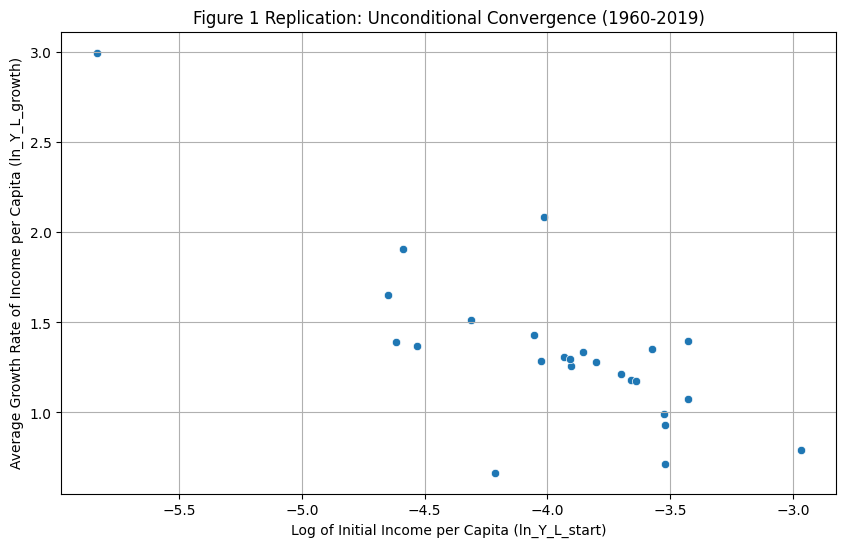

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_mrw_new_period is available
if 'df_mrw_new_period' in locals():
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='ln_Y_L_start', y='ln_Y_L_growth', data=df_mrw_new_period)

    # Add labels and title
    plt.xlabel('Log of Initial Income per Capita (ln_Y_L_start)')
    plt.ylabel('Average Growth Rate of Income per Capita (ln_Y_L_growth)')
    plt.title('Figure 1 Replication: Unconditional Convergence (1960-2019)')
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Error: df_mrw_new_period DataFrame not found. Please run the data preparation steps first.")


--- Generating Figure I: Unconditional vs. Conditional Convergence Plots (1960-2019) ---


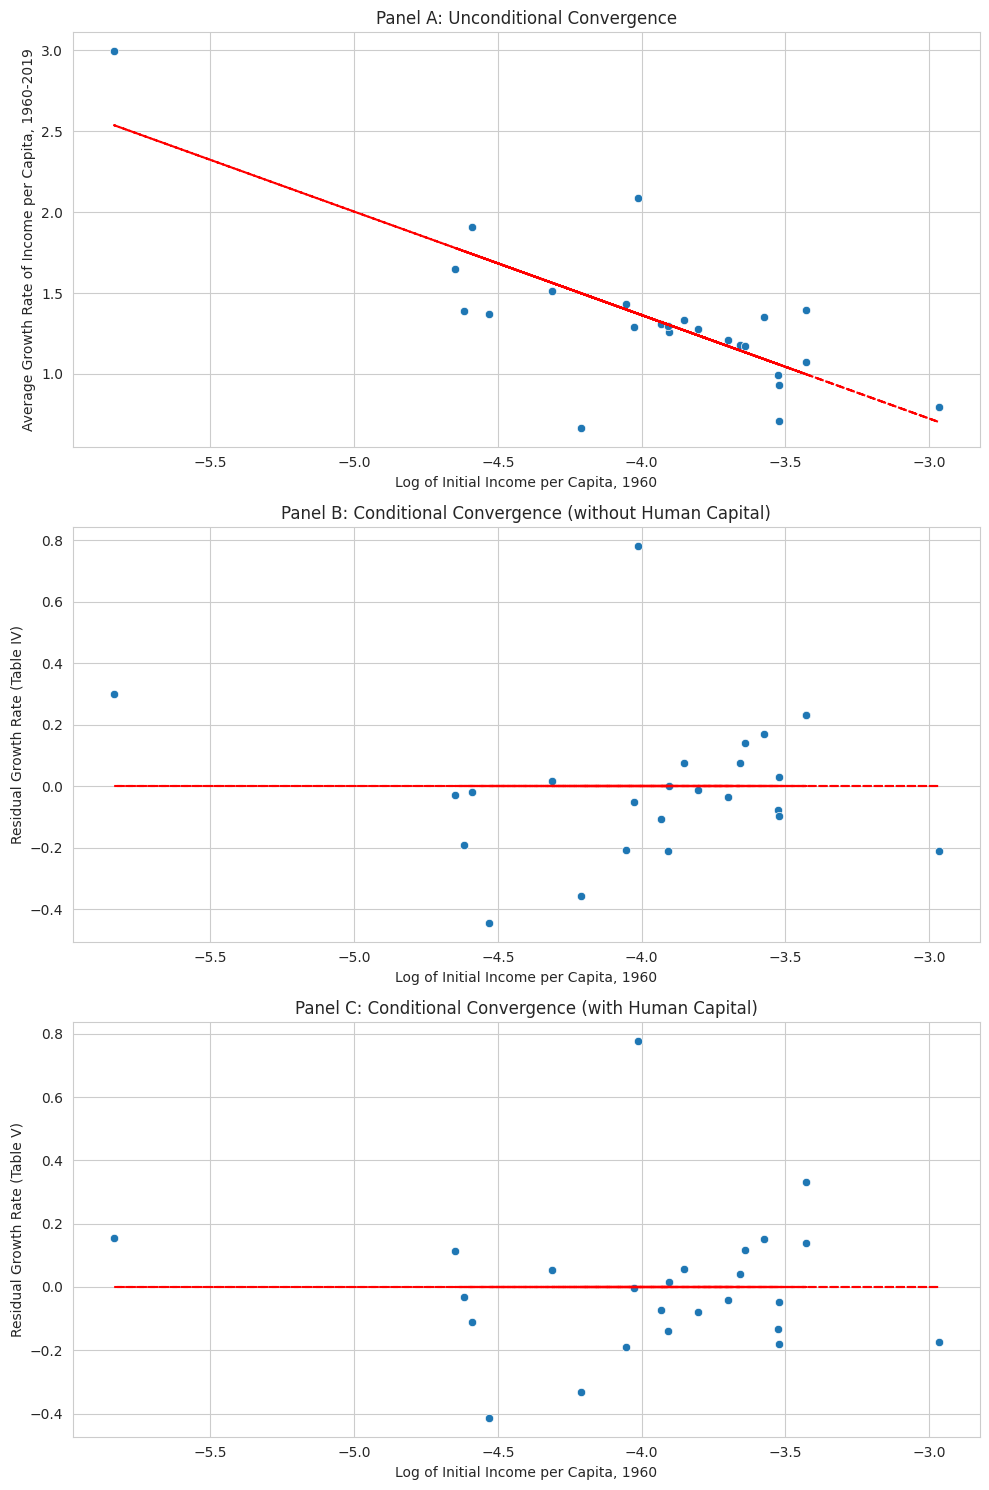

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf # For formula-based regression
import numpy as np # Import numpy for log

print("\n--- Generating Figure I: Unconditional vs. Conditional Convergence Plots (1960-2019) ---")

# Set a consistent style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 18] # A bit taller for 3 plots
plt.rcParams['figure.dpi'] = 100

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15)) # Adjust figsize as needed

# --- Panel A: Unconditional Convergence ---
# This plots the raw growth rate against initial income
sns.scatterplot(x='ln_Y_L_start', y='ln_Y_L_growth', data=df_mrw_new_period, ax=axes[0])
# Add the regression line from Table III (Unconditional Convergence)
# For this, we need the results from the regression on df_mrw_new_period
# Assuming results_t3_new_period is available from previous execution
if 'results_t3_new_period' in locals():
    axes[0].plot(df_mrw_new_period['ln_Y_L_start'], results_t3_new_period.predict(df_mrw_new_period[['ln_Y_L_start']]), color='red', linestyle='--')
axes[0].set_xlabel('Log of Initial Income per Capita, 1960')
axes[0].set_ylabel('Average Growth Rate of Income per Capita, 1960-2019')
axes[0].set_title('Panel A: Unconditional Convergence')


# --- Panel B: Conditional Convergence (without Human Capital) ---
# Plot residuals of Table IV regression against ln_Y_L_start
# Assuming results_t4_new_period is available from previous execution
if 'results_t4_new_period' in locals():
    # Calculate residuals from the Table IV regression
    residuals_t4 = results_t4_new_period.resid

    sns.scatterplot(x=df_mrw_new_period['ln_Y_L_start'], y=residuals_t4, ax=axes[1])

    # Add a regression line to these residuals vs ln_Y_L_start
    # This is equivalent to regressing residuals on ln_Y_L_start
    model_resid_t4 = sm.OLS(residuals_t4, sm.add_constant(df_mrw_new_period['ln_Y_L_start'])).fit()
    axes[1].plot(df_mrw_new_period['ln_Y_L_start'], model_resid_t4.predict(sm.add_constant(df_mrw_new_period['ln_Y_L_start'])), color='red', linestyle='--')

axes[1].set_xlabel('Log of Initial Income per Capita, 1960')
axes[1].set_ylabel('Residual Growth Rate (Table IV)')
axes[1].set_title('Panel B: Conditional Convergence (without Human Capital)')


# --- Panel C: Conditional Convergence (with Human Capital) ---
# Plot residuals of Table V regression against ln_Y_L_start
# Assuming results_t5_new_period is available from previous execution
if 'results_t5_new_period' in locals():
    # Calculate residuals from the Table V regression
    residuals_t5 = results_t5_new_period.resid

    sns.scatterplot(x=df_mrw_new_period['ln_Y_L_start'], y=residuals_t5, ax=axes[2])

    # Add a regression line to these residuals vs ln_Y_L_start
    # This is equivalent to regressing residuals on ln_Y_L_start
    model_resid_t5 = sm.OLS(residuals_t5, sm.add_constant(df_mrw_new_period['ln_Y_L_start'])).fit()
    axes[2].plot(df_mrw_new_period['ln_Y_L_start'], model_resid_t5.predict(sm.add_constant(df_mrw_new_period['ln_Y_L_start'])), color='red', linestyle='--')

axes[2].set_xlabel('Log of Initial Income per Capita, 1960')
axes[2].set_ylabel('Residual Growth Rate (Table V)')
axes[2].set_title('Panel C: Conditional Convergence (with Human Capital)')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()